## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'ravdess-1e5rawim' #dataset-compression
TRANSFORM = 'erb-statement_1' #transform-group
CHANNEL = ''

In [2]:
path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
if CHANNEL:
    path_list.append(CHANNEL)
print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")
FULL_DATA_NAME='-'.join(path_list)

Name the notebook:
statement_1_erb_1e5rawim_ravdess.ipynb


In [3]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.path.join(ROOT_DIR, "results-audio", "case-studies", *path_list)

assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)

GROUP = 'band' 
RERUN = False
SKIP_OPTIMIZE_STEP = False
CWD

'e:\\Research\\UCB\\Strang Lab\\Github\\hierarchical-bayesian-model-validation\\results-audio\\case-studies\\ravdess\\1e5rawim\\erb\\statement_1'

In [4]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [5]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data-audio", "subsample-data", f'{FULL_DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data-audio", "subsample-data", f'{FULL_DATA_NAME}-size.pickle'))
NUM_BANDS = int(10) #Change to len(group_data_map) to use all bands

In [6]:
if 'erb' in TRANSFORM:
    group_data_map.popitem()
    print(group_data_map)

{0: array([-0.09081733, -0.08645006, -0.08265163, ...,  0.08239813,
        0.08473241,  0.09081733]), 1: array([-8.6218287 , -8.21741533, -7.8054777 , ...,  7.75895905,
        7.87968866,  8.6218287 ]), 2: array([-3.1337206 , -3.03795404, -2.98379786, ...,  2.94266149,
        3.01283406,  3.1337206 ]), 3: array([-7.19306138, -7.00811262, -6.78490143, ...,  6.65762584,
        6.83489957,  7.19306138]), 4: array([-6.38237217, -6.22032843, -5.95685016, ...,  5.84936517,
        6.12155118,  6.38237217]), 5: array([-11.94721962, -10.855817  , -10.69018467, ...,  10.6798639 ,
        10.85396914,  11.94721962]), 6: array([-8.94495033, -8.58262618, -8.46955897, ...,  8.46843671,
        8.55202004,  8.94495033]), 7: array([-8.03585749, -7.61762866, -7.39857737, ...,  7.39777453,
        7.61759394,  8.03585749]), 8: array([-6.88034726, -6.1889387 , -5.96840983, ...,  5.96817993,
        6.18872521,  6.88034726]), 9: array([-4.44675573, -3.00165653, -2.75650146, ...,  2.75611117,
        

In [7]:
#if 'fourier' in TRANSFORM:
#    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
#elif 'wavelet' in TRANSFORM:
#    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
#GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::max(len(group_data_map) // NUM_BANDS, 1)]
GROUPS = np.linspace(2, sorted(group_data_map)[-1], NUM_BANDS, dtype=int)


cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = sorted([os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)])
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[:6]: # TODO For quick testing purposes. Currently excluding 20000 CDFs. Use cdfs_list[5:6] to access CDFs/_test
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # TODO For quick testing purposes
#group_total_samples
#group_data_map


Running 12760 CDFs


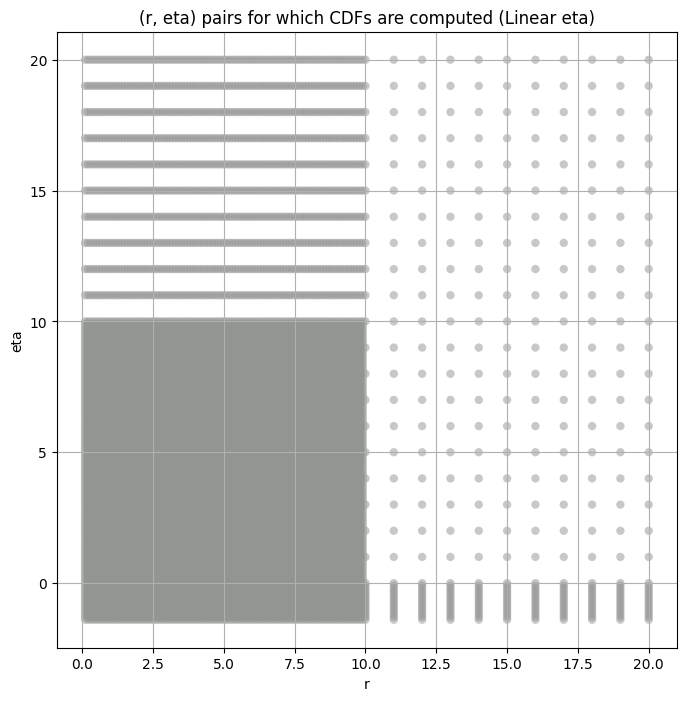

(r,eta),cdf    r  eta  \
0  ((0.1, -1.4), <scipy.interpolate._fitpack2.Int...  0.1 -1.4   
1  ((0.1, -1.3), <scipy.interpolate._fitpack2.Int...  0.1 -1.3   
2  ((0.1, -1.2), <scipy.interpolate._fitpack2.Int...  0.1 -1.2   
3  ((0.1, -1.1), <scipy.interpolate._fitpack2.Int...  0.1 -1.1   
4  ((0.1, -1.0), <scipy.interpolate._fitpack2.Int...  0.1 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.628800e+06   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.991680e+07   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  2.395008e+08   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.037837e+09   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.632429e+09   

        kurtosis  
0  554265.000000  
1   96192.272727  
2   29390.000000  
3   11997.692308  
4    5874.890110

In [8]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
fine_cdfs_df = all_cdfs_df.copy()
all_cdfs_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 1) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 1) == all_cdfs_df['eta'])]
all_cdfs_df = all_cdfs_df.reset_index(drop=True)
all_cdfs = {x[0] : x[1] for x in all_cdfs_df["(r,eta),cdf"]}
                                             
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
temp_cdf = all_cdfs_df
print(f"Running {all_cdfs_df.shape[0]} CDFs")
create_scatter_plot(all_cdfs_df);
all_cdfs_df.head()

## Bootstrapping the Variance and Kurtosis

In [9]:
n_bootstrap = int(1e5) # TODO For quick testing purposes
bootstrap_size = int(1e4) # TODO For quick testing purposes
ci = 0.99

In [10]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not master_df_var_kurt_path.exists(): # TODO For quick testing purposes
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

obs_var  var_lower  var_upper     obs_kurt  kurt_lower   kurt_upper  \
band                                                                         
2     0.020206   0.015851   0.025584    83.964375   46.909287   118.146290   
3     0.256283   0.214199   0.302689    43.138762   35.351158    51.792258   
5     2.057145   1.885970   2.233575     8.796670    7.687018    10.016815   
6     1.450882   1.325339   1.580467     9.696205    8.608607    10.835801   
8     0.160220   0.138249   0.185770    31.333083   19.939225    45.387652   
9     0.039620   0.035092   0.045332    22.360826   11.461388    58.472622   
11    0.010345   0.008290   0.013071    75.422116   36.701403   175.435022   
12    0.003920   0.002925   0.005474   150.818993   53.980298   398.559330   
14    0.000316   0.000212   0.000692   864.075969   55.677941  2196.862204   
16    0.000065   0.000035   0.000147  1081.723363  139.237130  2712.951852   

      total_samples  
band                 
2           99186.0  
3          100000.0  
5          100000.0  
6          100000.0  
8          100000.0  
9          100000.0  
11         100000.0  
12         100000.0  
14         100000.0  
16         100000.0

## Initial Grid Search and Hypothesis Test Plots

In [11]:
EXCLUDE_CUTOFFS = [0, 25, 50, 75, 100, 150, 200, 250, 300, 350, 500] # TODO For quick testing purposes
SCALE_CAP = 1e5

In [12]:
augmented_var_df_path = Path(os.path.join(CWD, "CSVs", "augmented_var_df.csv"))
augmented_var_df = var_kurt_df[['obs_var']].copy()
augmented_var_df
for val in EXCLUDE_CUTOFFS:
    temp_arr = []
    for group in GROUPS:
        if val != 0:
            temp_arr.append(np.var(group_data_map[group][val:-val]))
        else:
            temp_arr.append(np.var(group_data_map[group]))

    augmented_var_df[f"var_exclude_{val}"] = temp_arr
augmented_var_df

obs_var  var_exclude_0  var_exclude_25  var_exclude_50  var_exclude_75  \
band                                                                            
2     0.020206       0.020206        0.017110        0.015323        0.014109   
3     0.256283       0.256283        0.237610        0.223204        0.210943   
5     2.057145       2.057145        2.009038        1.970375        1.935676   
6     1.450882       1.450882        1.418405        1.390155        1.364402   
8     0.160220       0.160220        0.147200        0.139476        0.133585   
9     0.039620       0.039620        0.036981        0.035658        0.034636   
11    0.010345       0.010345        0.008958        0.008277        0.007772   
12    0.003920       0.003920        0.003158        0.002841        0.002617   
14    0.000316       0.000316        0.000230        0.000207        0.000190   
16    0.000065       0.000065        0.000038        0.000031        0.000026   

      var_exclude_100  var_exclude_150  var_exclude_200  var_exclude_250  \
band                                                                       
2            0.013250         0.012004         0.011137         0.010522   
3            0.200293         0.182280         0.167709         0.155308   
5            1.903670         1.845477         1.792966         1.744883   
6            1.340328         1.296419         1.256794         1.220440   
8            0.128748         0.121018         0.114886         0.109758   
9            0.033786         0.032387         0.031233         0.030236   
11           0.007363         0.006721         0.006226         0.005824   
12           0.002443         0.002181         0.001986         0.001832   
14           0.000177         0.000157         0.000143         0.000131   
16           0.000023         0.000019         0.000016         0.000014   

      var_exclude_300  var_exclude_350  var_exclude_500  
band                                                     
2            0.010033         0.009633         0.008714  
3            0.144423         0.134941         0.112976  
5            1.700169         1.658431         1.547678  
6            1.186698         1.155316         1.072134  
8            0.105352         0.101488         0.092123  
9            0.029351         0.028551         0.026513  
11           0.005488         0.005200         0.004528  
12           0.001705         0.001599         0.001356  
14           0.000122         0.000114         0.000096  
16           0.000012         0.000011         0.000009

####
Band  2


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 0 0.008059879337362075 0.02020617179953489


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 25 0.007030823266313768 0.01710950259040038


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 50 0.004581187948568988 0.015323079573502924


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 75 0.004601846105836582 0.014109028904272184


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 100 0.005976696344305532 0.013250472734238601


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 150 0.0030897596818942885 0.012003704052338072


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 200 0.0030775858080976937 0.011137415823636768


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 250 0.0033870196775039885 0.010521974898439274


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 300 0.005697219129994768 0.010032937056118902


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 350 0.005323482992544815 0.009632751784269668


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 500 0.0065241432643376 0.008713709216660386
Number of samples: 100000, Without approximation : 99186.0


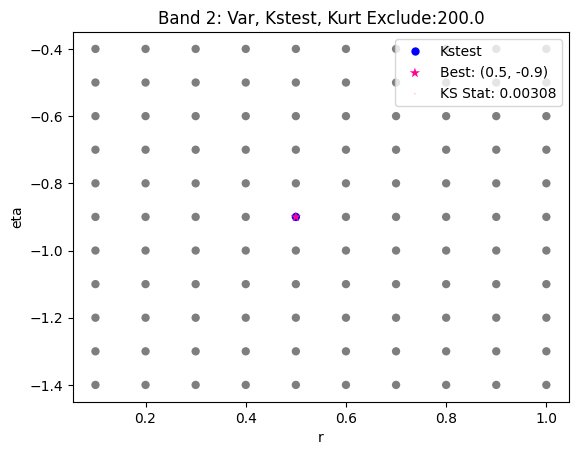

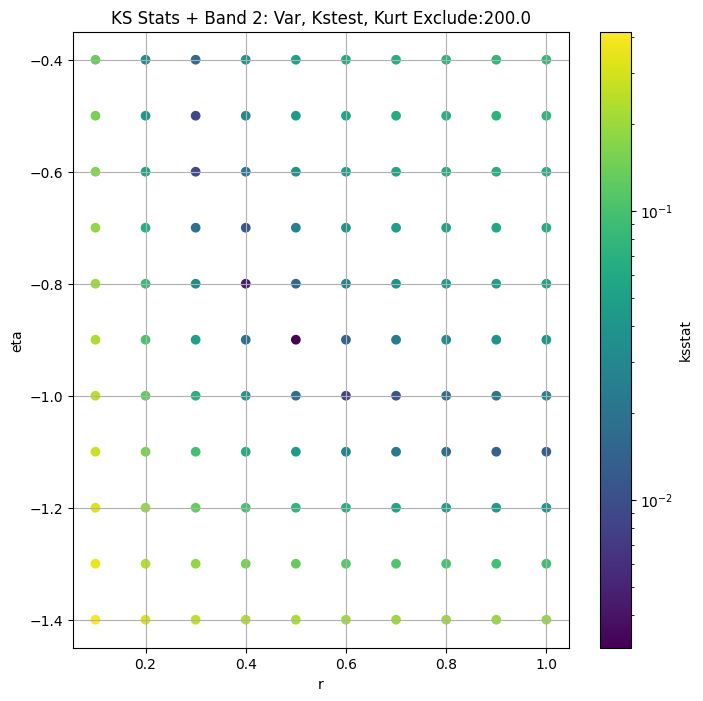

####
Band  3


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 0 0.026086630595793747 0.25628258715346186


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 25 0.022449199394934505 0.23760995584874167


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 50 0.01946047799244277 0.223204118614495


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 75 0.018434788291346482 0.21094303175809567


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 100 0.019932277808411836 0.20029272308631998


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 150 0.0231345308237636 0.1822803233369956


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 200 0.019656243784348937 0.1677090817981405


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 250 0.015729236291509907 0.15530841586359947


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 300 0.014621342596884301 0.14442331619358706


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 350 0.016944724317360993 0.13494094266027953


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
3 500 0.01670999342713408 0.11297598619924941
Number of samples: 100000, Without approximation : 100000.0


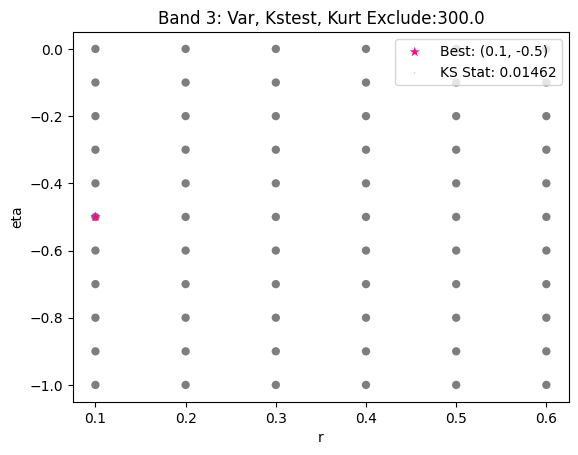

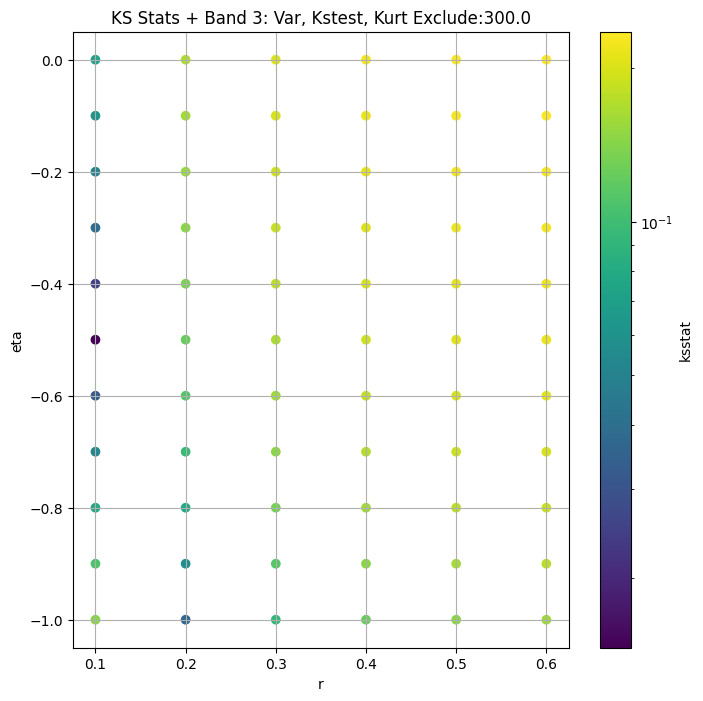

####
Band  5


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 0 0.011548855105587397 2.0571446580267096


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 25 0.011839933423244964 2.0090383211587


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 50 0.01181585724728007 1.9703752571374482


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 75 0.010933432087116168 1.9356761721898663


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 100 0.010112934704842869 1.9036703170724623


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 150 0.009763282201294632 1.84547664344799


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 200 0.010063510856230251 1.7929660816365354


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 250 0.01035656484230496 1.74488342412236


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 300 0.011257594331588183 1.7001694219263752


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 350 0.01075111079534763 1.6584310088130159


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
5 500 0.012774069144753715 1.5476784452625894
Number of samples: 100000, Without approximation : 100000.0


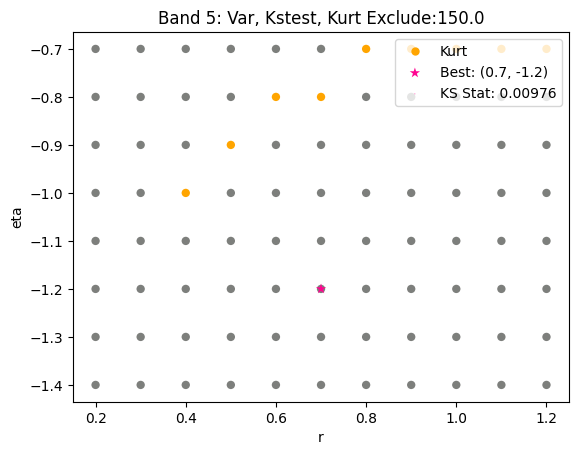

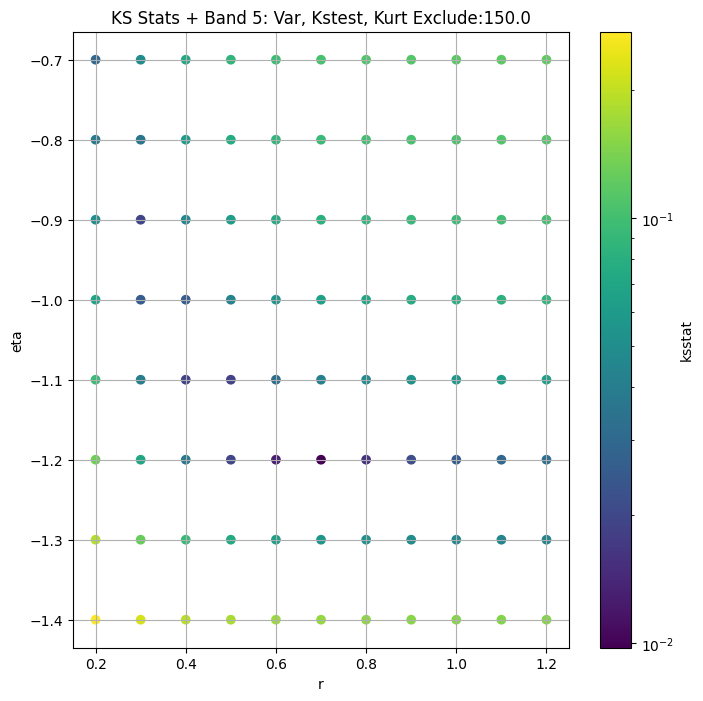

####
Band  6


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 0 0.008776760081915108 1.4508821862765875


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 25 0.009563366362985319 1.4184048809912722


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 50 0.010256373741069906 1.3901554304745962


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 75 0.010895460590247694 1.3644023689851483


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 100 0.011499351456860027 1.340328073529906


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 150 0.012719495867430826 1.2964193599084692


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 200 0.013848661820899229 1.2567943715844763


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 250 0.013313244598705976 1.2204404255114725


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 300 0.012658219525240377 1.1866982405497992


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 350 0.013100009414220848 1.1553162103488177


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
6 500 0.01370415786672241 1.072133649256242
Number of samples: 100000, Without approximation : 100000.0


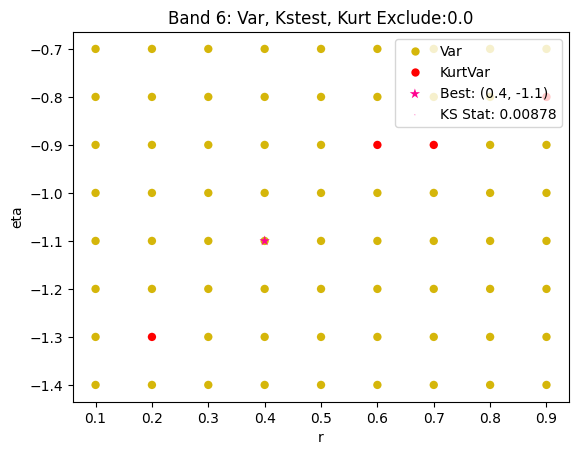

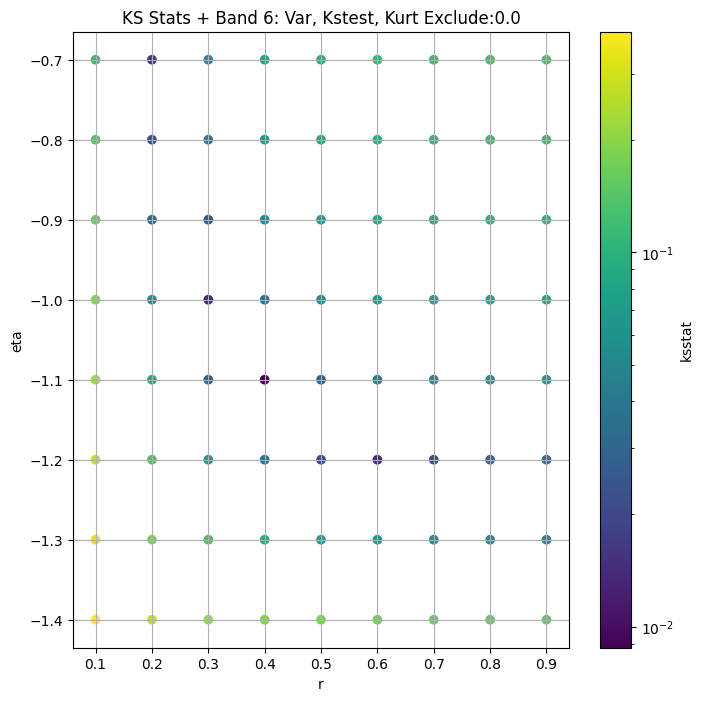

####
Band  8


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 0 0.007563372866039031 0.16022037907064027


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 25 0.004793087366820936 0.1471997010324821


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 50 0.006139057672946424 0.13947614271419292


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 75 0.004113875919810439 0.13358515578411773


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 100 0.0048504998914924435 0.12874770992161136


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 150 0.005496814732395966 0.12101843586387125


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 200 0.007660264882618062 0.11488564501594375


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 250 0.00600381394248839 0.10975782037779197


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 300 0.004942149786835041 0.1053519195426953


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 350 0.006286280002825315 0.10148754476930932


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
8 500 0.008076268261018725 0.09212323436210422
Number of samples: 100000, Without approximation : 100000.0


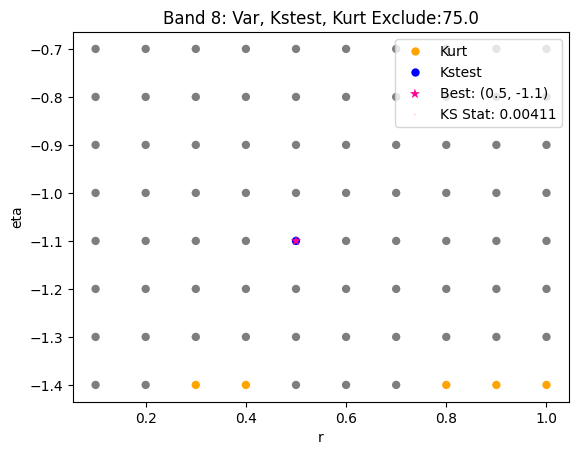

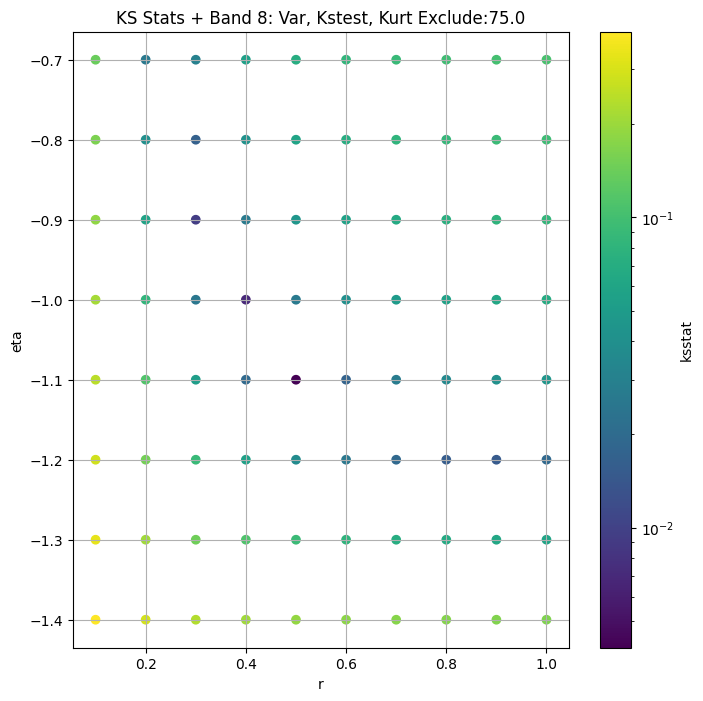

####
Band  9


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 0 0.0031187063112321223 0.03962032123184069


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 25 0.006087799291984011 0.03698106943063123


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 50 0.00812853275181774 0.03565842613930076


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 75 0.008697136954520013 0.034636038654907005


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 100 0.007482022279200917 0.03378612111143862


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 150 0.006088517012992095 0.03238688947623107


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 200 0.007806628831812754 0.03123302998550233


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 250 0.00938230424596262 0.030235929931671898


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 300 0.010170274930342504 0.02935059137207818


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 350 0.008886047835029887 0.02855077856557792


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
9 500 0.010529747063765527 0.026512893928084147
Number of samples: 100000, Without approximation : 100000.0


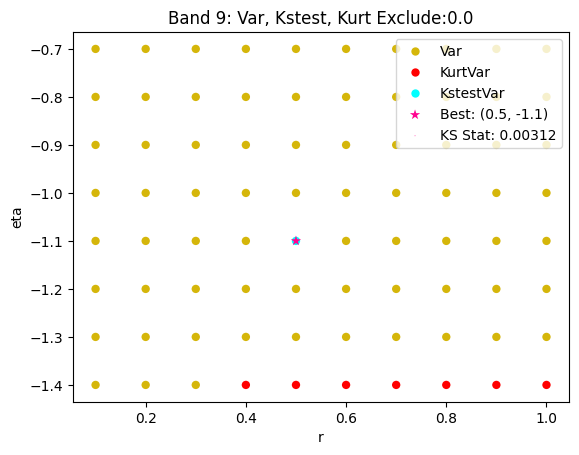

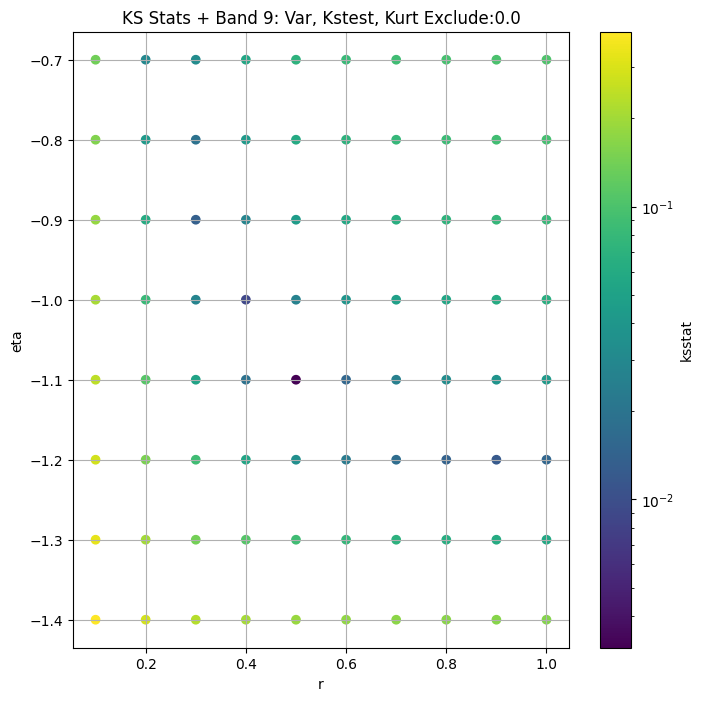

####
Band  11


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 0 0.010138602857796775 0.01034451311783529


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 25 0.006148768989431397 0.008958239090861788


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 50 0.0058626685568684556 0.008277425233823188


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 75 0.006956459764721534 0.007771826802939012


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 100 0.00821957724119056 0.007362547182119582


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 150 0.012553650156978235 0.006721454315102817


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 200 0.009477655291577847 0.006226184783360952


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 250 0.010836855937828793 0.0058241313376507405


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 300 0.01308129169483474 0.005487946220084579


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 350 0.011227074762865774 0.005200011980967451


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
11 500 0.009646750316143662 0.00452770546989896
Number of samples: 100000, Without approximation : 100000.0


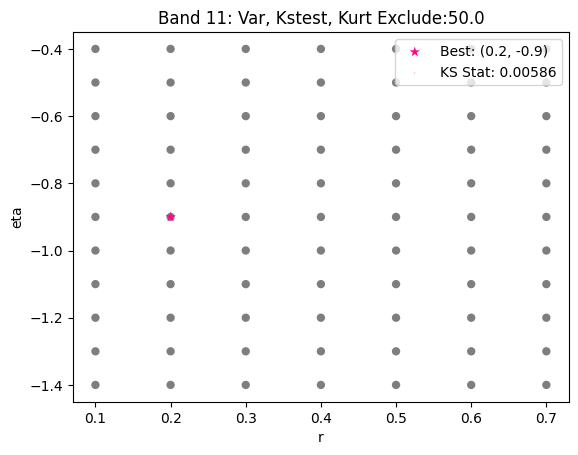

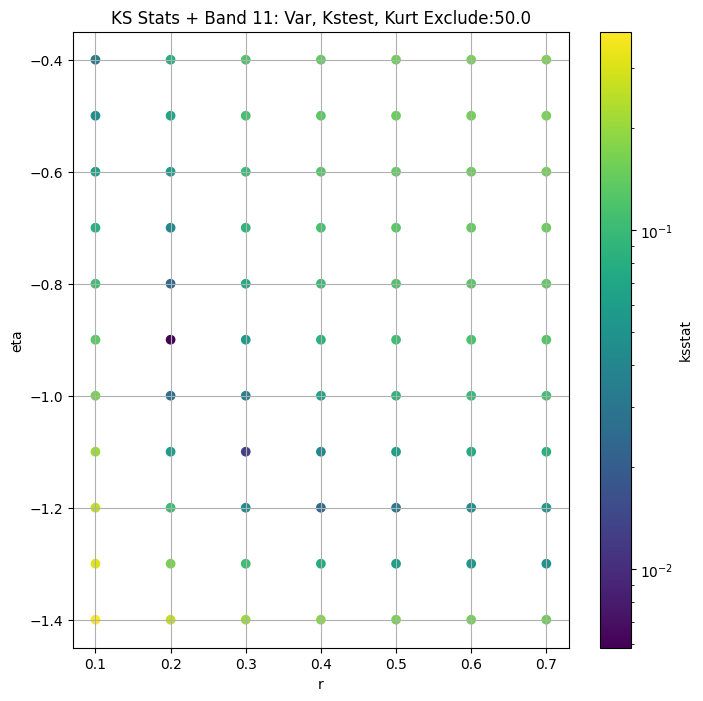

####
Band  12


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 0 0.007565825766604695 0.003919518787078978


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 25 0.0038944764751129013 0.003158218710527351


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 50 0.005263694786225903 0.0028405706838616103


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 75 0.004804629734764143 0.0026169349710254306


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 100 0.007866888905872838 0.0024431266771501084


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 150 0.007465449290776166 0.0021811575526201644


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 200 0.010636263963496706 0.001986300535618775


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 250 0.0063920946647169075 0.0018320560282623513


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 300 0.007211605284609204 0.0017054227014177577


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 350 0.008684699449166756 0.0015986156002601305


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
12 500 0.00906619731027137 0.0013557179503115606
Number of samples: 100000, Without approximation : 100000.0


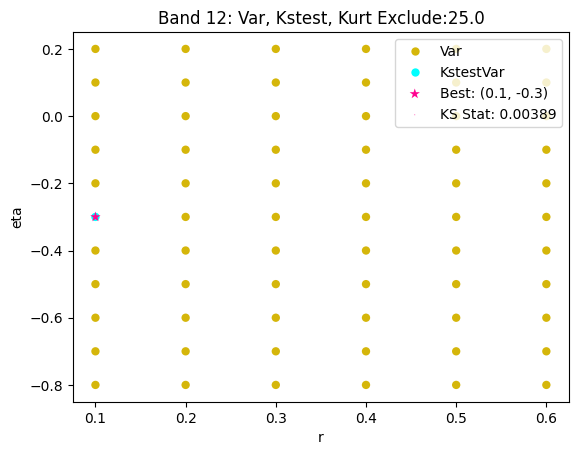

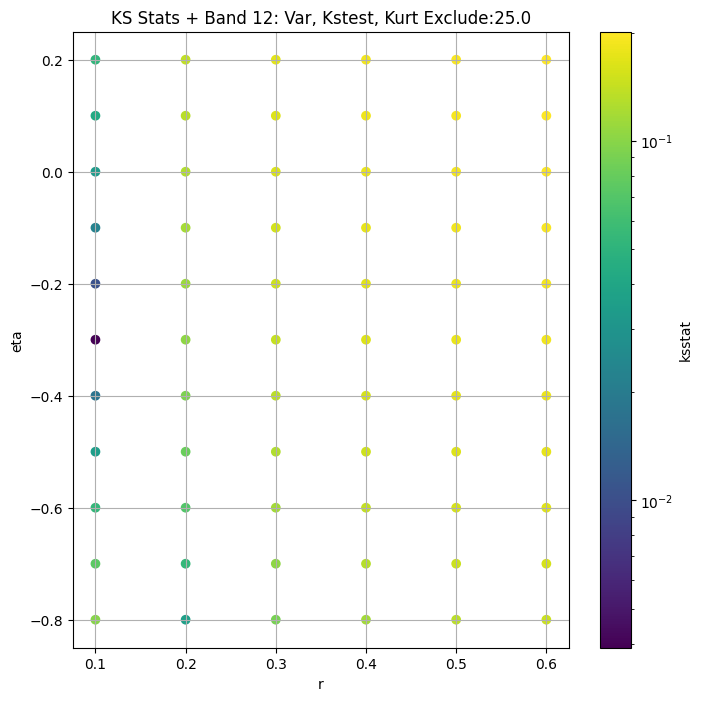

####
Band  14


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 0 0.013366178421551855 0.0003159101213440701


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 25 0.00943275090530421 0.00022999145688865554


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 50 0.007265799079675728 0.00020657067039397316


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 75 0.0065412844444205365 0.00018997254054789453


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 100 0.006419382314267863 0.00017702501944679517


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 150 0.004758808969330952 0.0001573785842193811


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 200 0.005400580508832891 0.00014271218753215007


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 250 0.006253867978618481 0.00013113910551130356


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 300 0.007421074872860811 0.00012165508477886301


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 350 0.0066214162339449 0.0001136774062216671


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
14 500 0.009015228475360439 9.563221424561917e-05
Number of samples: 100000, Without approximation : 100000.0


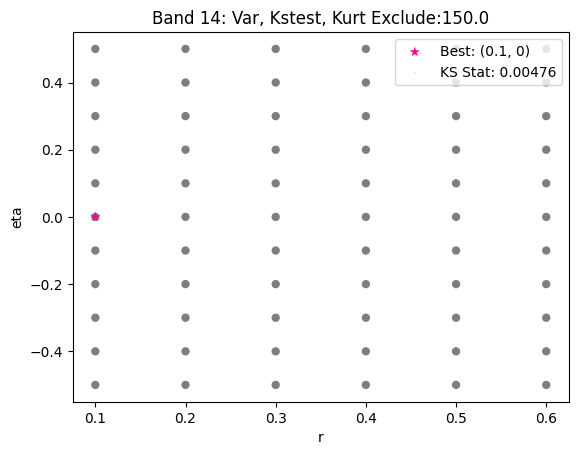

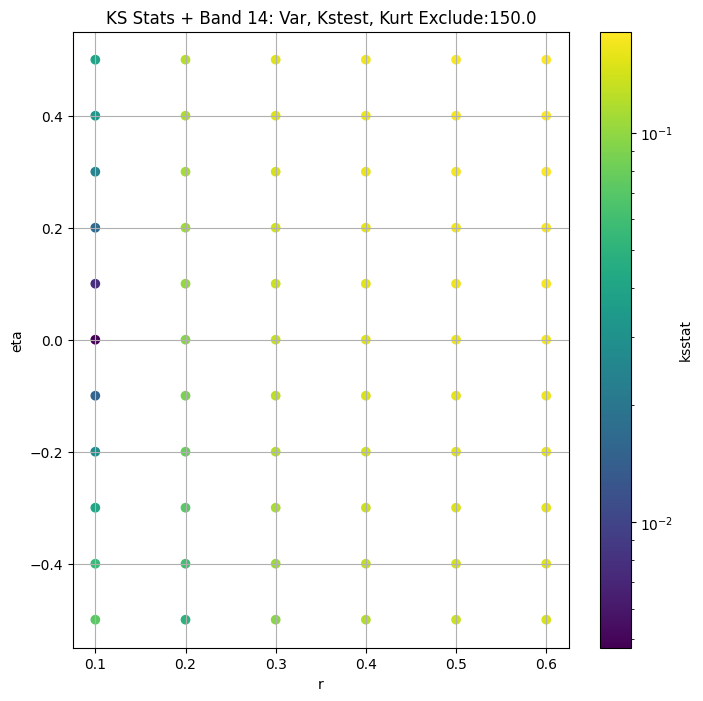

####
Band  16


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 0 0.028324757546605794 6.496193448355956e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 25 0.02520701580926943 3.832111834218493e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 50 0.01832506570626974 3.096325591665087e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 75 0.017096538346165202 2.6392428213048944e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 100 0.016051302673090295 2.316308627710675e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 150 0.012413727541399355 1.8819117649849593e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 200 0.008452107376256346 1.5991217072678476e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 250 0.007783049007139331 1.3988366099770234e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 300 0.008732307694666763 1.2484806510176995e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 350 0.006320190079314282 1.1308612521861087e-05


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
16 500 0.00928244006279615 8.916086851759853e-06
Number of samples: 100000, Without approximation : 100000.0


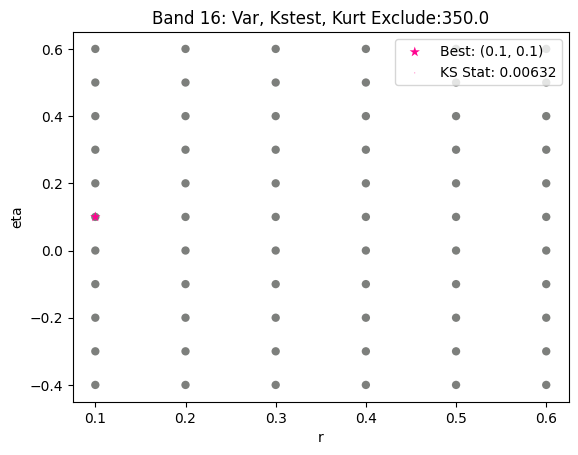

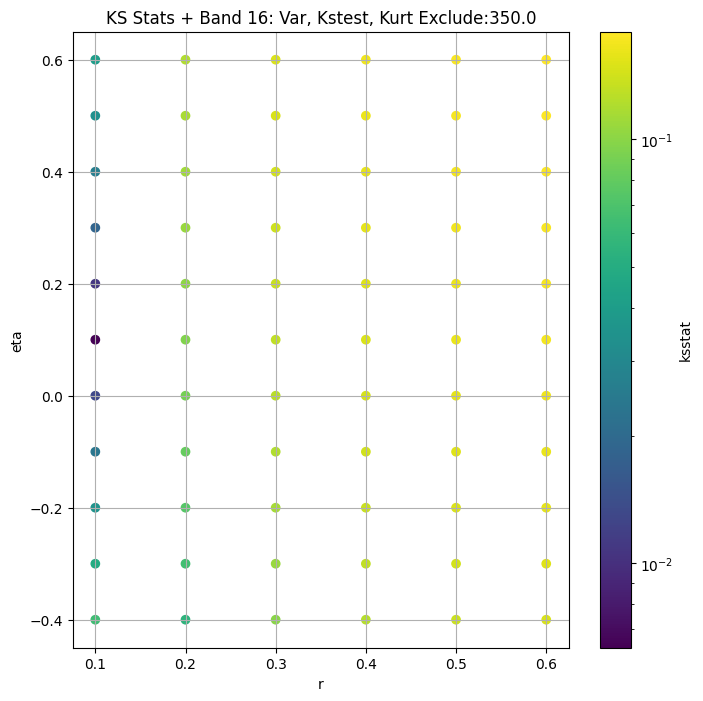

obs_var  var_lower  var_upper     obs_kurt  kurt_lower   kurt_upper  \
band                                                                         
2     0.020206   0.015851   0.025584    83.964375   46.909287   118.146290   
3     0.256283   0.214199   0.302689    43.138762   35.351158    51.792258   
5     2.057145   1.885970   2.233575     8.796670    7.687018    10.016815   
6     1.450882   1.325339   1.580467     9.696205    8.608607    10.835801   
8     0.160220   0.138249   0.185770    31.333083   19.939225    45.387652   
9     0.039620   0.035092   0.045332    22.360826   11.461388    58.472622   
11    0.010345   0.008290   0.013071    75.422116   36.701403   175.435022   
12    0.003920   0.002925   0.005474   150.818993   53.980298   398.559330   
14    0.000316   0.000212   0.000692   864.075969   55.677941  2196.862204   
16    0.000065   0.000035   0.000147  1081.723363  139.237130  2712.951852   

      total_samples  kstest_stat_initial  initial_r  initial_eta  \
band                                                               
2           99186.0             0.003078        0.5         -0.9   
3          100000.0             0.014621        0.1         -0.5   
5          100000.0             0.009763        0.7         -1.2   
6          100000.0             0.008777        0.4         -1.1   
8          100000.0             0.004114        0.5         -1.1   
9          100000.0             0.003119        0.5         -1.1   
11         100000.0             0.005863        0.2         -0.9   
12         100000.0             0.003894        0.1         -0.3   
14         100000.0             0.004759        0.1          0.0   
16         100000.0             0.006320        0.1          0.1   

      initial_scale  initial_exclude_cutoff  best_augmented_var  \
band                                                              
2      4.218718e-03                   200.0            0.011137   
3      4.308298e-13                   300.0            0.144423   
5      4.025684e+00                   150.0            1.845477   
6      4.365721e-01                     0.0            1.450882   
8      9.276747e-02                    75.0            0.133585   
9      2.751411e-02                     0.0            0.039620   
11     3.284693e-06                    50.0            0.008277   
12     2.467482e-15                    25.0            0.003158   
14     2.211303e-17                   150.0            0.000157   
16     9.533739e-19                   350.0            0.000011   

      kstest_stat_cutoff_0.05  
band                           
2                    0.004311  
3                    0.004293  
5                    0.004293  
6                    0.004293  
8                    0.004293  
9                    0.004293  
11                   0.004293  
12                   0.004293  
14                   0.004293  
16                   0.004293

In [13]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))

rEtaKsstats_dict = dict()

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS): # TODO For quick testing purposes
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        if len(sample) == 0:
            continue
        group_cdfs_df = all_cdfs_df.copy()
        master_df.loc[group, 'kstest_stat_initial'] = 1

        for j in range(len(EXCLUDE_CUTOFFS)):

            exclude_cutoff = EXCLUDE_CUTOFFS[j]
            exclude_cutoff = int(exclude_cutoff)

            if exclude_cutoff == 0:
                augmented_var = np.var(group_data_map[group]) 
            else:
                augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])
                if augmented_var == np.var(group_data_map[group]):
                    continue 
                
            group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
            ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True, scales=group_cdfs_df['scale'])
            augmented_var_df.loc[group, f"kstest_stat_{exclude_cutoff}"] = min_stat
            group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] = ksstats
            
            print(group, exclude_cutoff, min_stat, augmented_var)
            
            if (min_stat < master_df.loc[group, 'kstest_stat_initial']) and not np.isclose(min_stat, master_df.loc[group, 'kstest_stat_initial'], 1e-6):
                inital_min_stat = min_stat
                inital_best_param = initial_param
                master_df.loc[group, 'kstest_stat_initial'] = min_stat
                initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
                master_df.loc[group, 'initial_scale'] = initial_scale
                master_df.loc[group, 'initial_exclude_cutoff'] = exclude_cutoff
                master_df.loc[group, 'best_augmented_var'] = augmented_var
        
        ksstats = group_cdfs_df[f"ksstat_exclude_{int(master_df.loc[group, 'initial_exclude_cutoff'])}"]
            
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

        group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
        group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

        group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

        group_dict = {'r' : group_cdfs_df['r'], 'eta' : group_cdfs_df['eta']}
        group_dict.update({f'ksstat_exclude_{exclude_cutoff}' : group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] for exclude_cutoff in EXCLUDE_CUTOFFS[:j+1]})
        rEtaKsstats_dict[group] = group_dict

        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdfs_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])} Exclude:{master_df.loc[group, 'initial_exclude_cutoff']}", 
                            target_var = None,
                            best_param = inital_best_param,
                            best_ksstat=inital_min_stat
                            )
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)

        # Optional: 
        # Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdfs_df, var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdfs_df, kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(master_df_combo_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)
    augmented_var_df.to_csv(augmented_var_df_path)

augmented_var_df = pd.read_csv(augmented_var_df_path, index_col=GROUP)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df

## Optimization

In [14]:
master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
master_df[f'best_r'] = master_df['initial_r']
master_df[f'best_eta'] = master_df['initial_eta']
master_df[f'best_scale'] = master_df['initial_scale']
master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

Band 2


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + 100 = 300, ksstat: 0.003877533082542254, var: 0.010032937056118902


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + 75 = 275, ksstat: 0.0036155947049758413, var: 0.010265455507021161


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + 50 = 250, ksstat: 0.003311148124331493, var: 0.010521974898439274


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + 25 = 225, ksstat: 0.0030302069667525666, var: 0.010811168341231279


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + 0 = 200, ksstat: 0.0028155047305361545, var: 0.011137415823636768


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + -25 = 175, ksstat: 0.0025755925252998616, var: 0.011523416024831685


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + -50 = 150, ksstat: 0.002279679483550289, var: 0.012003704052338072


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + -75 = 125, ksstat: 0.0022136669648301632, var: 0.012567653249419374


  0%|          | 0/1790 [00:00<?, ?it/s]

Finding Minimum after computing 1790 CDFs
band 2, 200.0 + -100 = 100, ksstat: 0.0030879262728369106, var: 0.013250472734238601
Number of samples: 100000, Without approximation : 99186.0


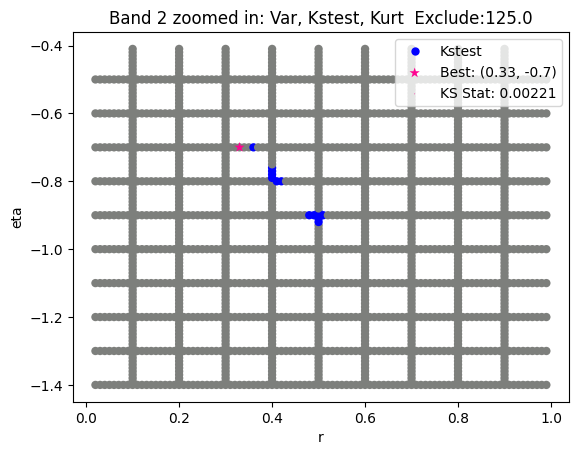

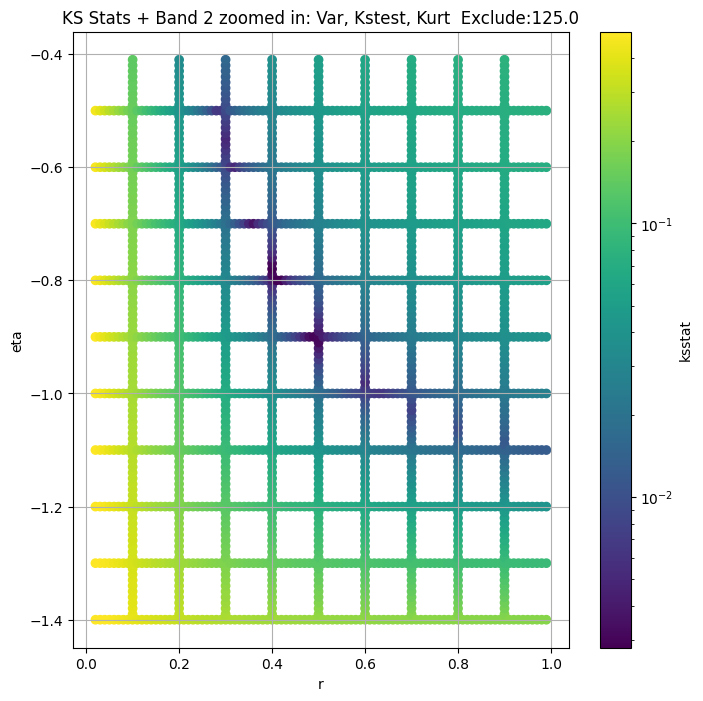

Band 3


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + 100 = 400, ksstat: 0.015355793195855335, var: 0.12674363964900173


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + 75 = 375, ksstat: 0.015029722611193366, var: 0.13071640511624807


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + 50 = 350, ksstat: 0.014836102849458119, var: 0.13494094266027953


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + 25 = 325, ksstat: 0.01450776006121796, var: 0.1394895217651188


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + 0 = 300, ksstat: 0.014288943356755807, var: 0.14442331619358706


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + -25 = 275, ksstat: 0.013930835683741188, var: 0.14967896481943208


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + -50 = 250, ksstat: 0.014231739153095963, var: 0.15530841586359947


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + -75 = 225, ksstat: 0.014141301804853623, var: 0.16127875020765753


  0%|          | 0/972 [00:00<?, ?it/s]

Finding Minimum after computing 972 CDFs
band 3, 300.0 + -100 = 200, ksstat: 0.014557778957789758, var: 0.1677090817981405
Number of samples: 100000, Without approximation : 100000.0


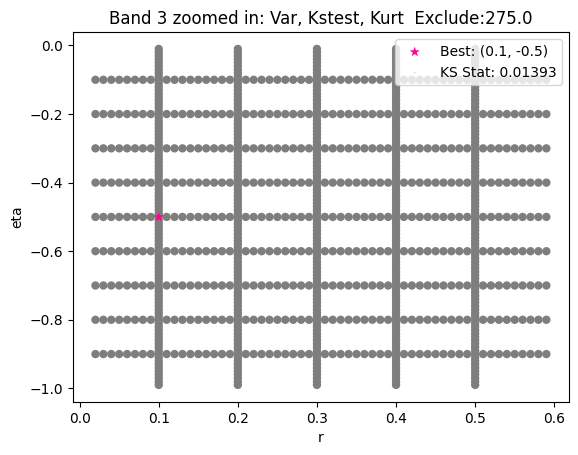

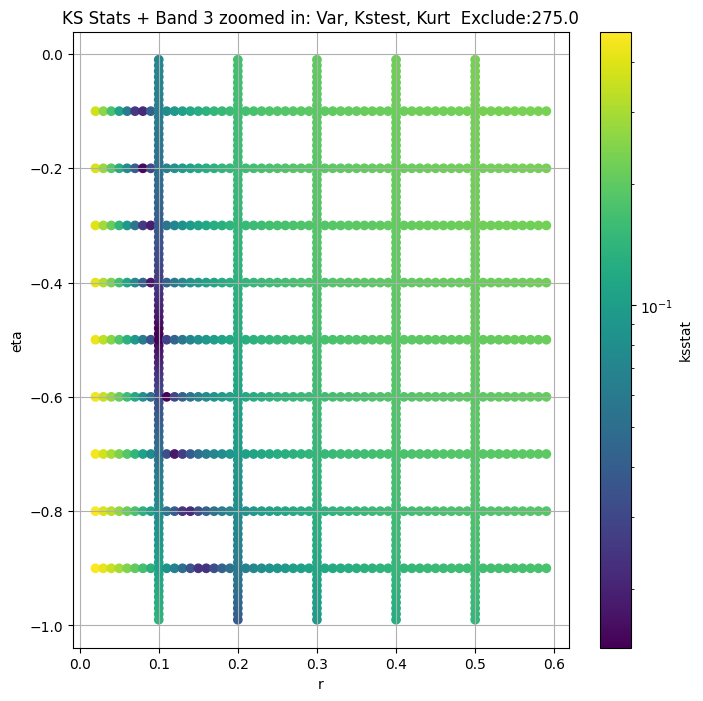

Band 5


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + 100 = 250, ksstat: 0.009479921483051934, var: 1.74488342412236


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + 75 = 225, ksstat: 0.009548115994975848, var: 1.7684709423753608


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + 50 = 200, ksstat: 0.009619771008164801, var: 1.7929660816365354


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + 25 = 175, ksstat: 0.00953485930605047, var: 1.8185736930532408


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + 0 = 150, ksstat: 0.009543165825637911, var: 1.84547664344799


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + -25 = 125, ksstat: 0.009518378040841269, var: 1.8737327223604452


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + -50 = 100, ksstat: 0.008845161685791192, var: 1.9036703170724623


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + -75 = 75, ksstat: 0.008485807862941175, var: 1.9356761721898663


  0%|          | 0/1380 [00:00<?, ?it/s]

Finding Minimum after computing 1380 CDFs
band 5, 150.0 + -100 = 50, ksstat: 0.009340000120986902, var: 1.9703752571374482
Number of samples: 100000, Without approximation : 100000.0


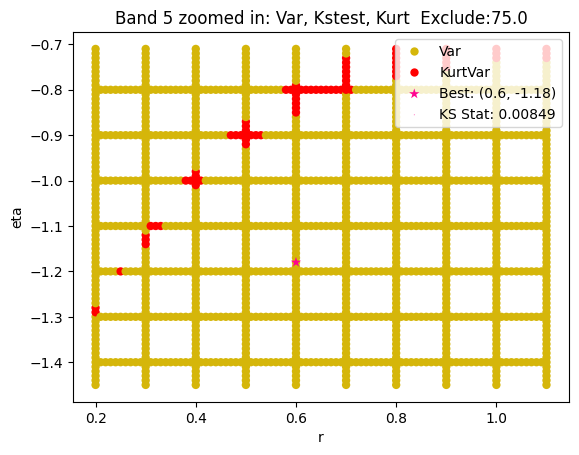

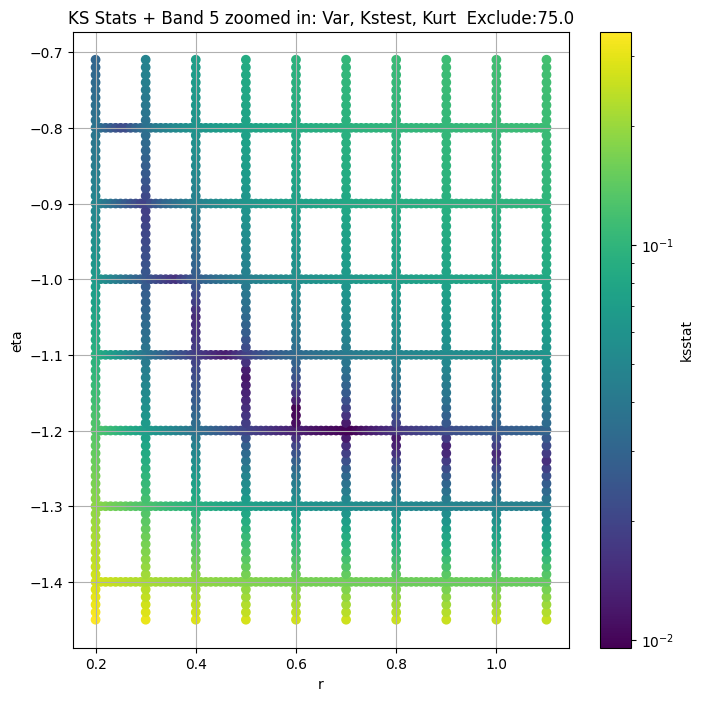

Band 6


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 6, 0.0 + 100 = 100, ksstat: 0.009752717624294971, var: 1.340328073529906


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 6, 0.0 + 75 = 75, ksstat: 0.009403571418528767, var: 1.3644023689851483


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 6, 0.0 + 50 = 50, ksstat: 0.009050783326647993, var: 1.3901554304745962


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 6, 0.0 + 25 = 25, ksstat: 0.009200382839595678, var: 1.4184048809912722


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 6, 0.0 + 0 = 0, ksstat: 0.008776760081915108, var: 1.4508821862765875
Number of samples: 100000, Without approximation : 100000.0


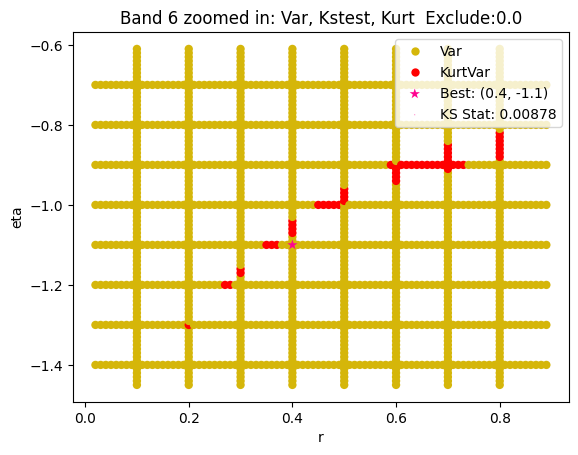

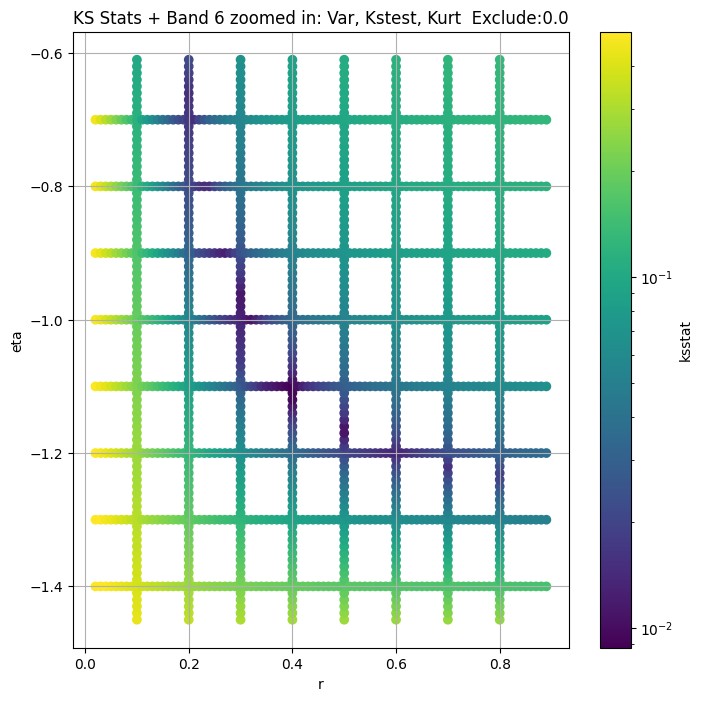

Band 8


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + 100 = 175, ksstat: 0.0032612517655479095, var: 0.11779801435081066


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + 75 = 150, ksstat: 0.0025867683904401417, var: 0.12101843586387125


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + 50 = 125, ksstat: 0.003384122725501537, var: 0.12463225722416964


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + 25 = 100, ksstat: 0.003049221521045392, var: 0.12874770992161136


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + 0 = 75, ksstat: 0.0023397417690173006, var: 0.13358515578411773


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + -25 = 50, ksstat: 0.001725866401277587, var: 0.13947614271419292


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + -50 = 25, ksstat: 0.0014212554561375823, var: 0.1471997010324821


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 8, 75.0 + -75 = 0, ksstat: 0.0021626881290378597, var: 0.16022037907064027
Number of samples: 100000, Without approximation : 100000.0


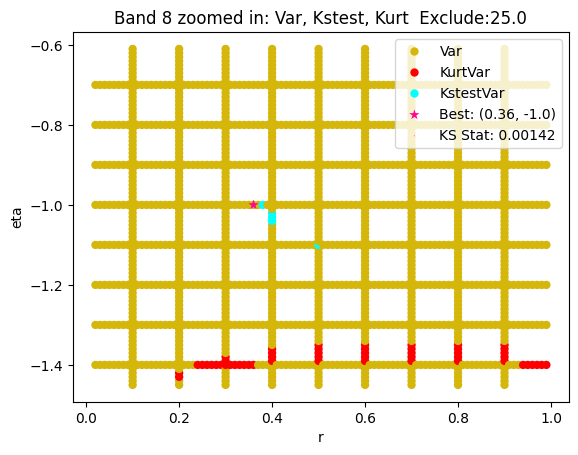

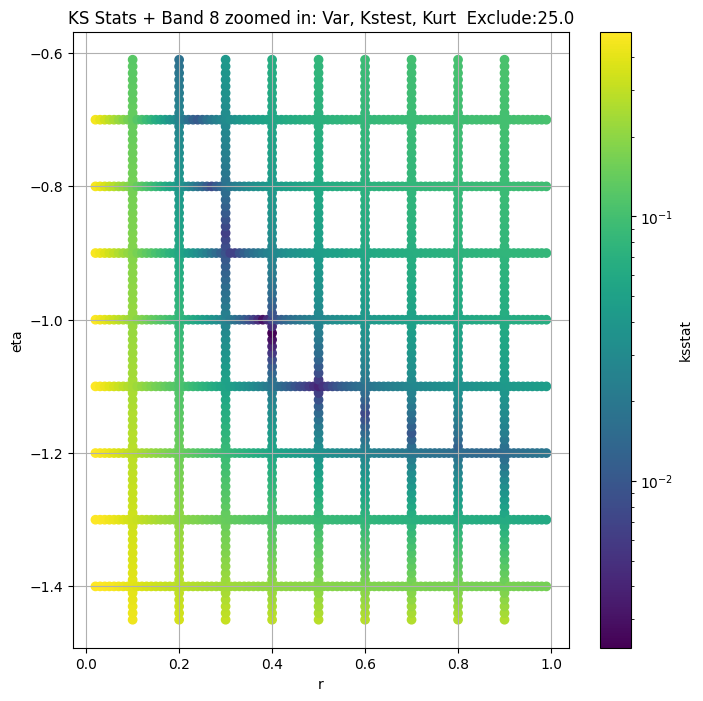

Band 9


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 100 = 100, ksstat: 0.004654907879166448, var: 0.03378612111143862


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 75 = 75, ksstat: 0.004029743958537391, var: 0.034636038654907005


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 50 = 50, ksstat: 0.004033579316173985, var: 0.03565842613930076


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 25 = 25, ksstat: 0.0034100265715028832, var: 0.03698106943063123


  0%|          | 0/1477 [00:00<?, ?it/s]

Finding Minimum after computing 1477 CDFs
band 9, 0.0 + 0 = 0, ksstat: 0.0031187063112321223, var: 0.03962032123184069
Number of samples: 100000, Without approximation : 100000.0


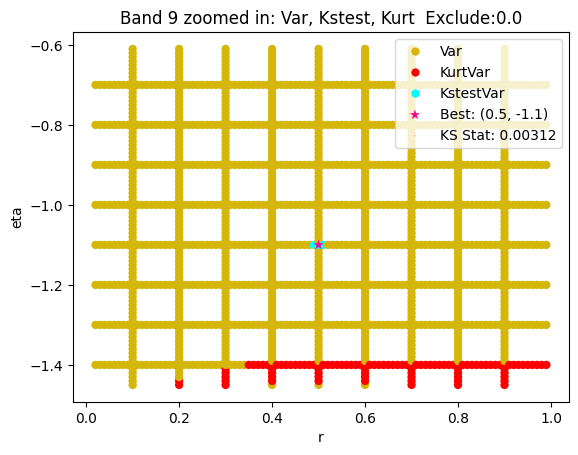

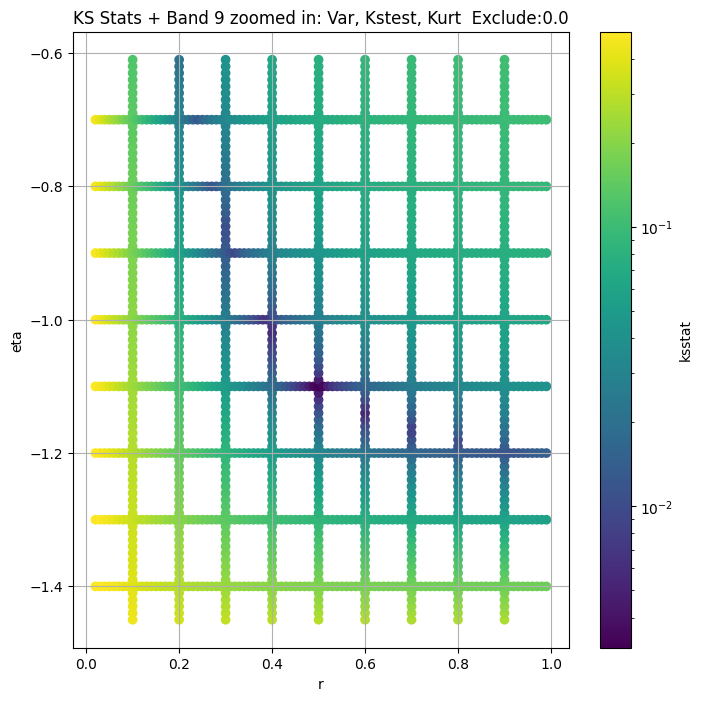

Band 11


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + 100 = 150, ksstat: 0.006397750812440768, var: 0.006721454315102817


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + 75 = 125, ksstat: 0.00670313258808964, var: 0.007018519940923445


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + 50 = 100, ksstat: 0.005337650956416466, var: 0.007362547182119582


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + 25 = 75, ksstat: 0.004772898242839149, var: 0.007771826802939012


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + 0 = 50, ksstat: 0.004662831861715178, var: 0.008277425233823188


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + -25 = 25, ksstat: 0.004172260794486515, var: 0.008958239090861788


  0%|          | 0/1320 [00:00<?, ?it/s]

Finding Minimum after computing 1320 CDFs
band 11, 50.0 + -50 = 0, ksstat: 0.005504176070857417, var: 0.01034451311783529
Number of samples: 100000, Without approximation : 100000.0


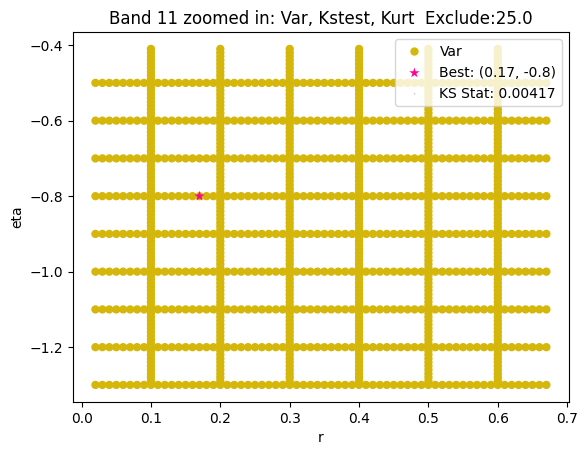

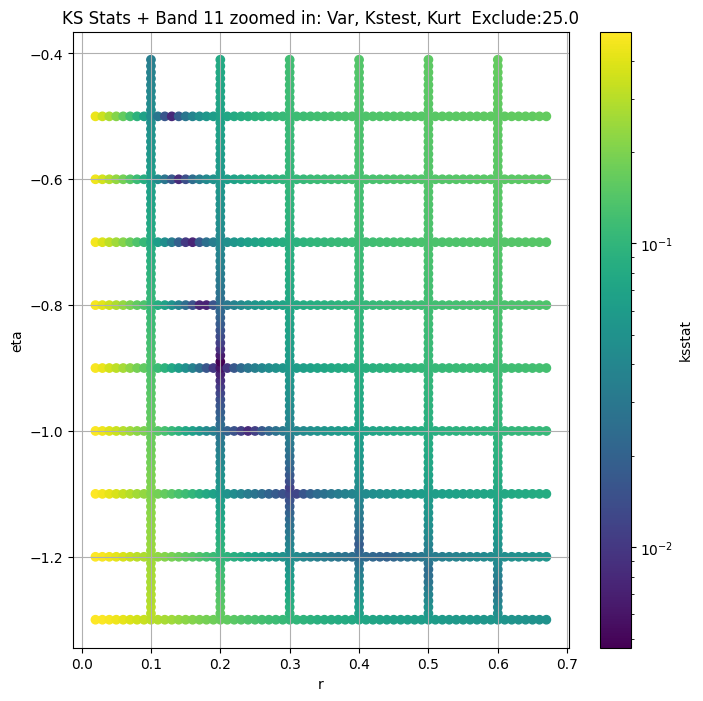

Band 12


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + 100 = 125, ksstat: 0.0038668530471295676, var: 0.0023011029803837522


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + 75 = 100, ksstat: 0.003793658045591012, var: 0.0024431266771501084


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + 50 = 75, ksstat: 0.0032275535488096585, var: 0.0026169349710254306


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + 25 = 50, ksstat: 0.0030092701152305765, var: 0.0028405706838616103


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + 0 = 25, ksstat: 0.0016241416406296422, var: 0.003158218710527351


  0%|          | 0/882 [00:00<?, ?it/s]

Finding Minimum after computing 882 CDFs
band 12, 25.0 + -25 = 0, ksstat: 0.00243886342570232, var: 0.003919518787078978
Number of samples: 100000, Without approximation : 100000.0


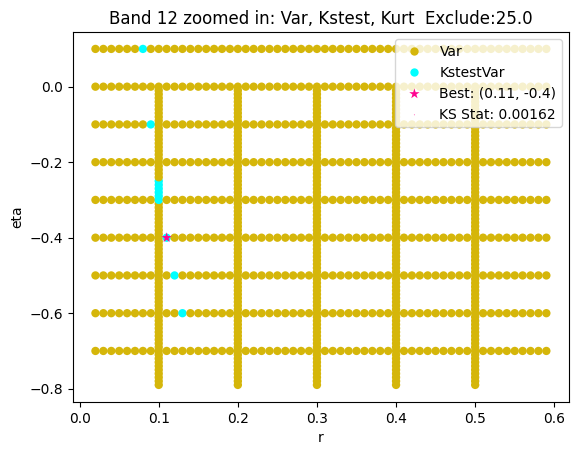

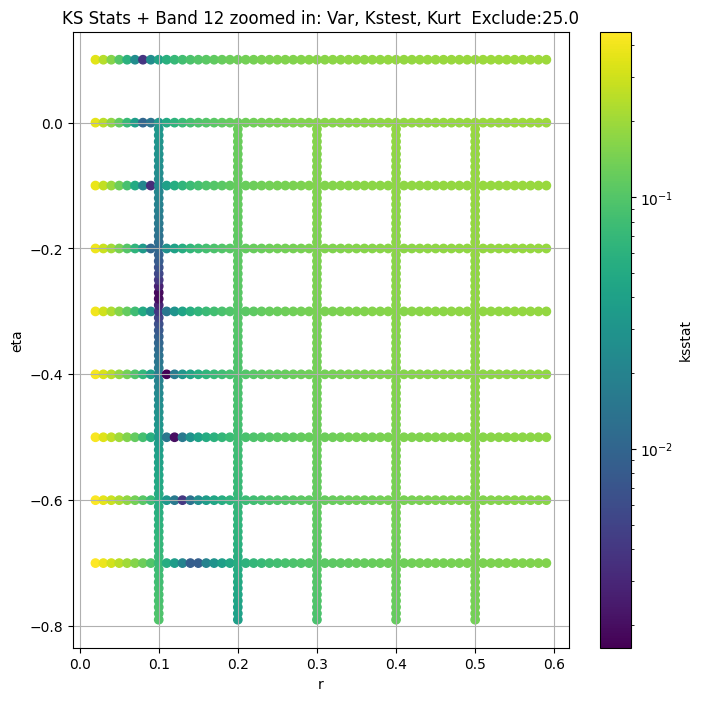

Band 14


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + 100 = 250, ksstat: 0.005837897166704648, var: 0.00013113910551130356


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + 75 = 225, ksstat: 0.0052144761062017965, var: 0.00013661501799699957


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + 50 = 200, ksstat: 0.004639558564284132, var: 0.00014271218753215007


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + 25 = 175, ksstat: 0.004683615169965138, var: 0.00014956818130861533


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + 0 = 150, ksstat: 0.004642471891338505, var: 0.0001573785842193811


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + -25 = 125, ksstat: 0.0037305066296431134, var: 0.0001663904955903067


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + -50 = 100, ksstat: 0.003439547792679418, var: 0.00017702501944679517


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + -75 = 75, ksstat: 0.003871879420467794, var: 0.00018997254054789453


  0%|          | 0/747 [00:00<?, ?it/s]

Finding Minimum after computing 747 CDFs
band 14, 150.0 + -100 = 50, ksstat: 0.0054547157909417, var: 0.00020657067039397316
Number of samples: 100000, Without approximation : 100000.0


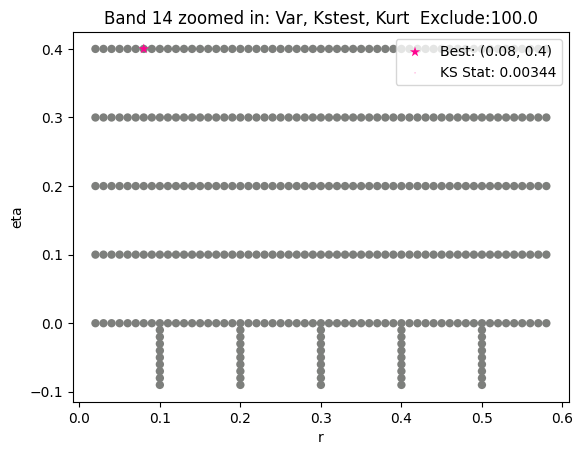

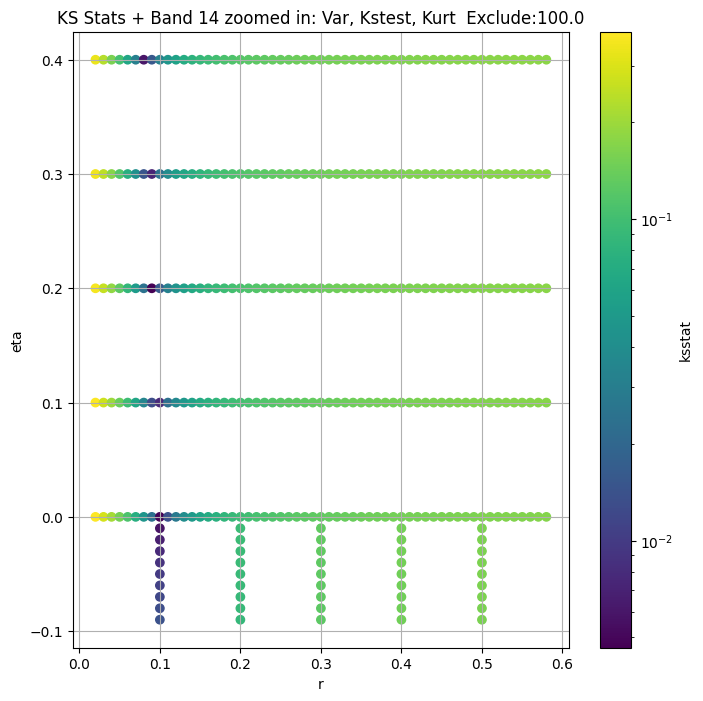

Band 16


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + 100 = 450, ksstat: 0.007473650422764686, var: 9.576273535462675e-06


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + 75 = 425, ksstat: 0.007325275651163365, var: 9.950688401834387e-06


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + 50 = 400, ksstat: 0.0070998640723691775, var: 1.0360224261118487e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + 25 = 375, ksstat: 0.00650431426621908, var: 1.0810404542665622e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + 0 = 350, ksstat: 0.005844683687256984, var: 1.1308612521861087e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + -25 = 325, ksstat: 0.005794193311751128, var: 1.1862999153206697e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + -50 = 300, ksstat: 0.00556828088502789, var: 1.2484806510176995e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + -75 = 275, ksstat: 0.005090321951756849, var: 1.3187327297025866e-05


  0%|          | 0/702 [00:00<?, ?it/s]

Finding Minimum after computing 702 CDFs
band 16, 350.0 + -100 = 250, ksstat: 0.004816616515290917, var: 1.3988366099770234e-05
Number of samples: 100000, Without approximation : 100000.0


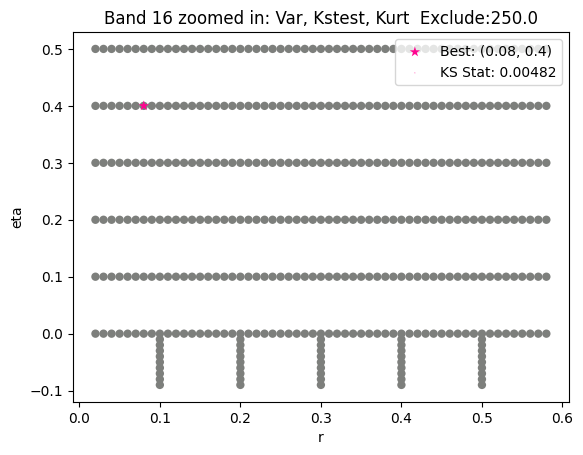

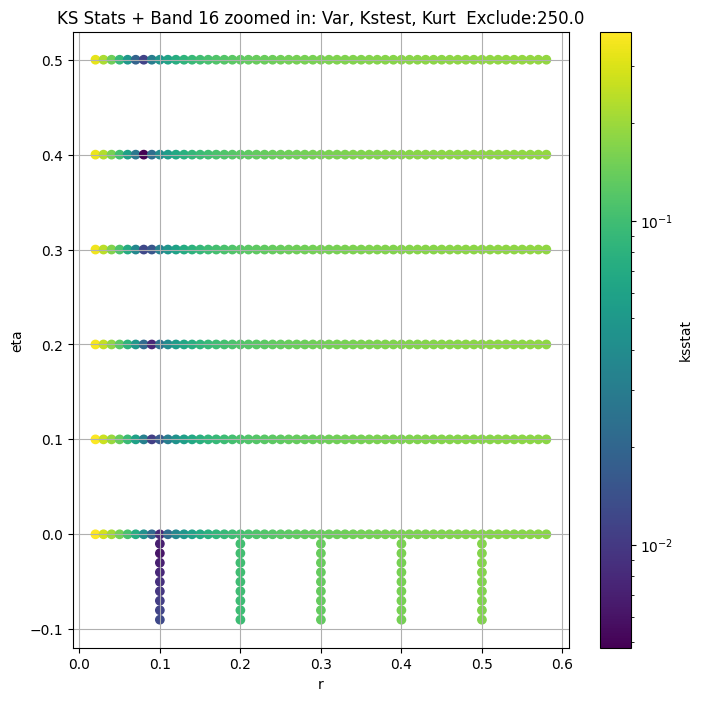

obs_var  var_lower  var_upper     obs_kurt  kurt_lower   kurt_upper  \
band                                                                         
2     0.020206   0.015851   0.025584    83.964375   46.909287   118.146290   
3     0.256283   0.214199   0.302689    43.138762   35.351158    51.792258   
5     2.057145   1.885970   2.233575     8.796670    7.687018    10.016815   
6     1.450882   1.325339   1.580467     9.696205    8.608607    10.835801   
8     0.160220   0.138249   0.185770    31.333083   19.939225    45.387652   
9     0.039620   0.035092   0.045332    22.360826   11.461388    58.472622   
11    0.010345   0.008290   0.013071    75.422116   36.701403   175.435022   
12    0.003920   0.002925   0.005474   150.818993   53.980298   398.559330   
14    0.000316   0.000212   0.000692   864.075969   55.677941  2196.862204   
16    0.000065   0.000035   0.000147  1081.723363  139.237130  2712.951852   

      total_samples  kstest_stat_initial  initial_r  initial_eta  \
band                                                               
2           99186.0             0.003078        0.5         -0.9   
3          100000.0             0.014621        0.1         -0.5   
5          100000.0             0.009763        0.7         -1.2   
6          100000.0             0.008777        0.4         -1.1   
8          100000.0             0.004114        0.5         -1.1   
9          100000.0             0.003119        0.5         -1.1   
11         100000.0             0.005863        0.2         -0.9   
12         100000.0             0.003894        0.1         -0.3   
14         100000.0             0.004759        0.1          0.0   
16         100000.0             0.006320        0.1          0.1   

      initial_scale  initial_exclude_cutoff  best_augmented_var  \
band                                                              
2      4.218718e-03                   200.0            0.012568   
3      4.308298e-13                   300.0            0.149679   
5      4.025684e+00                   150.0            1.935676   
6      4.365721e-01                     0.0            1.450882   
8      9.276747e-02                    75.0            0.147200   
9      2.751411e-02                     0.0            0.039620   
11     3.284693e-06                    50.0            0.008958   
12     2.467482e-15                    25.0            0.003158   
14     2.211303e-17                   150.0            0.000177   
16     9.533739e-19                   350.0            0.000014   

      kstest_stat_cutoff_0.05  kstest_stat_best  best_r  best_eta  \
band                                                                
2                    0.004311          0.002214    0.33     -0.70   
3                    0.004293          0.013931    0.10     -0.50   
5                    0.004293          0.008486    0.60     -1.18   
6                    0.004293          0.008777    0.40     -1.10   
8                    0.004293          0.001421    0.36     -1.00   
9                    0.004293          0.003119    0.50     -1.10   
11                   0.004293          0.004172    0.17     -0.80   
12                   0.004293          0.001624    0.11     -0.40   
14                   0.004293          0.003440    0.08      0.40   
16                   0.004293          0.004817    0.08      0.40   

        best_scale  best_exclude_cutoff  n_pval_0.05  
band                                                  
2     3.260108e-04                125.0       376596  
3     4.465079e-13                275.0         9375  
5     2.924333e+00                 75.0        25000  
6     4.365721e-01                  0.0        25000  
8     1.760053e-02                 25.0       961083  
9     2.751411e-02                  0.0       189843  
11    1.720418e-07                 25.0       106785  
12    1.372667e-13                 25.0       720810  
14    8.244393e-23                100.0       150000  
16    6.514649

In [15]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS))) # By default, does one iteration per group
NUM_SAMPLES_OPTIMIZE = 2000
EXCLUDE_CUTOFFS_OPTIMIZE = np.arange(100, -101, -25)

if RERUN or not master_df_optimized_path.exists():

    if SKIP_OPTIMIZE_STEP:

        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
        master_df[f'best_scale'] = master_df['initial_scale']
        master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

    else:
        for group in GROUPS: # TODO For quick testing purposes
            print(f"{GROUP.capitalize()} {group}")
            master_df.loc[group, 'kstest_stat_best'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r'] = master_df.loc[group, 'initial_r']
            master_df.loc[group, 'best_eta'] = master_df.loc[group, 'initial_eta']
            master_df.loc[group, 'best_scale'] = master_df.loc[group, 'initial_scale']

            sample = group_data_map[group]
            if len(sample) == 0:
                continue
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            eps = 0.5
            group_cdfs_df = fine_cdfs_df[(np.abs(master_df.loc[group, 'initial_r'] - fine_cdfs_df['r']) < eps) & 
                                        (np.abs(master_df.loc[group, 'initial_eta'] - fine_cdfs_df['eta']) < eps)].reset_index(drop=True)
            group_cdfs = {x[0]:x[1] for x in group_cdfs_df['(r,eta),cdf']}

            for adjust_exclude_cutoff in EXCLUDE_CUTOFFS_OPTIMIZE: # -50, -25, 0, 25, 50
                
                exclude_cutoff = int(max(0, adjust_exclude_cutoff + master_df.loc[group, 'initial_exclude_cutoff']))
                
                if exclude_cutoff == 0:
                    augmented_var = np.var(group_data_map[group])
                else:
                    augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])                       

                group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
                ksstats, initial_param, min_stat = gridsearch(sample, group_cdfs, debug=True, scales=group_cdfs_df['scale'])
                
                cutoff_label = generate_cutoff_label(adjust_exclude_cutoff)

                augmented_var_df.loc[group, f"kstest_stat_{cutoff_label}"] = min_stat
                group_cdfs_df[f'ksstat_exclude_{cutoff_label}'] = ksstats
                
                print(f"{GROUP} {group}, {master_df.loc[group, 'initial_exclude_cutoff']} + {adjust_exclude_cutoff} = {exclude_cutoff}, ksstat: {min_stat}, var: {augmented_var}")
                best_adjust = 0

                if min_stat < master_df.loc[group, 'kstest_stat_best']:

                    inital_min_stat = min_stat
                    inital_best_param = initial_param
                    master_df.loc[group, 'kstest_stat_best'] = min_stat
                    initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                    master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = initial_param
                    master_df.loc[group, 'best_scale'] = initial_scale
                    master_df.loc[group, 'best_exclude_cutoff'] = exclude_cutoff
                    master_df.loc[group, 'best_augmented_var'] = augmented_var
                    augmented_var_df.loc[group, 'best_augmented_var'] = augmented_var
                    best_adjust = adjust_exclude_cutoff

                if exclude_cutoff == 0:
                    break

            cutoff_label = generate_cutoff_label(best_adjust)
            ksstats = group_cdfs_df[f"ksstat_exclude_{cutoff_label}"]
            
            print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
            
            cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
            master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

            best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

            group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
            group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

            group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

            group_dict = rEtaKsstats_dict[group]
            group_dict.update({'r_optimize' : group_cdfs_df['r'], 'eta_optimize' : group_cdfs_df['eta'], f'ksstat_exclude_{cutoff_label}' : ksstats})
            rEtaKsstats_dict[group] = group_dict

            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(group_cdfs_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}  Exclude:{master_df.loc[group, 'best_exclude_cutoff']}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']),
                                best_ksstat=master_df.loc[group, 'kstest_stat_best'])
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'initial_exclude_cutoff', 'best_r', 'best_eta', 'best_scale', 'kstest_stat_best', 'best_exclude_cutoff', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    augmented_var_df.to_csv(augmented_var_df_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)

rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
augmented_var_df = pd.read_csv(augmented_var_df_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

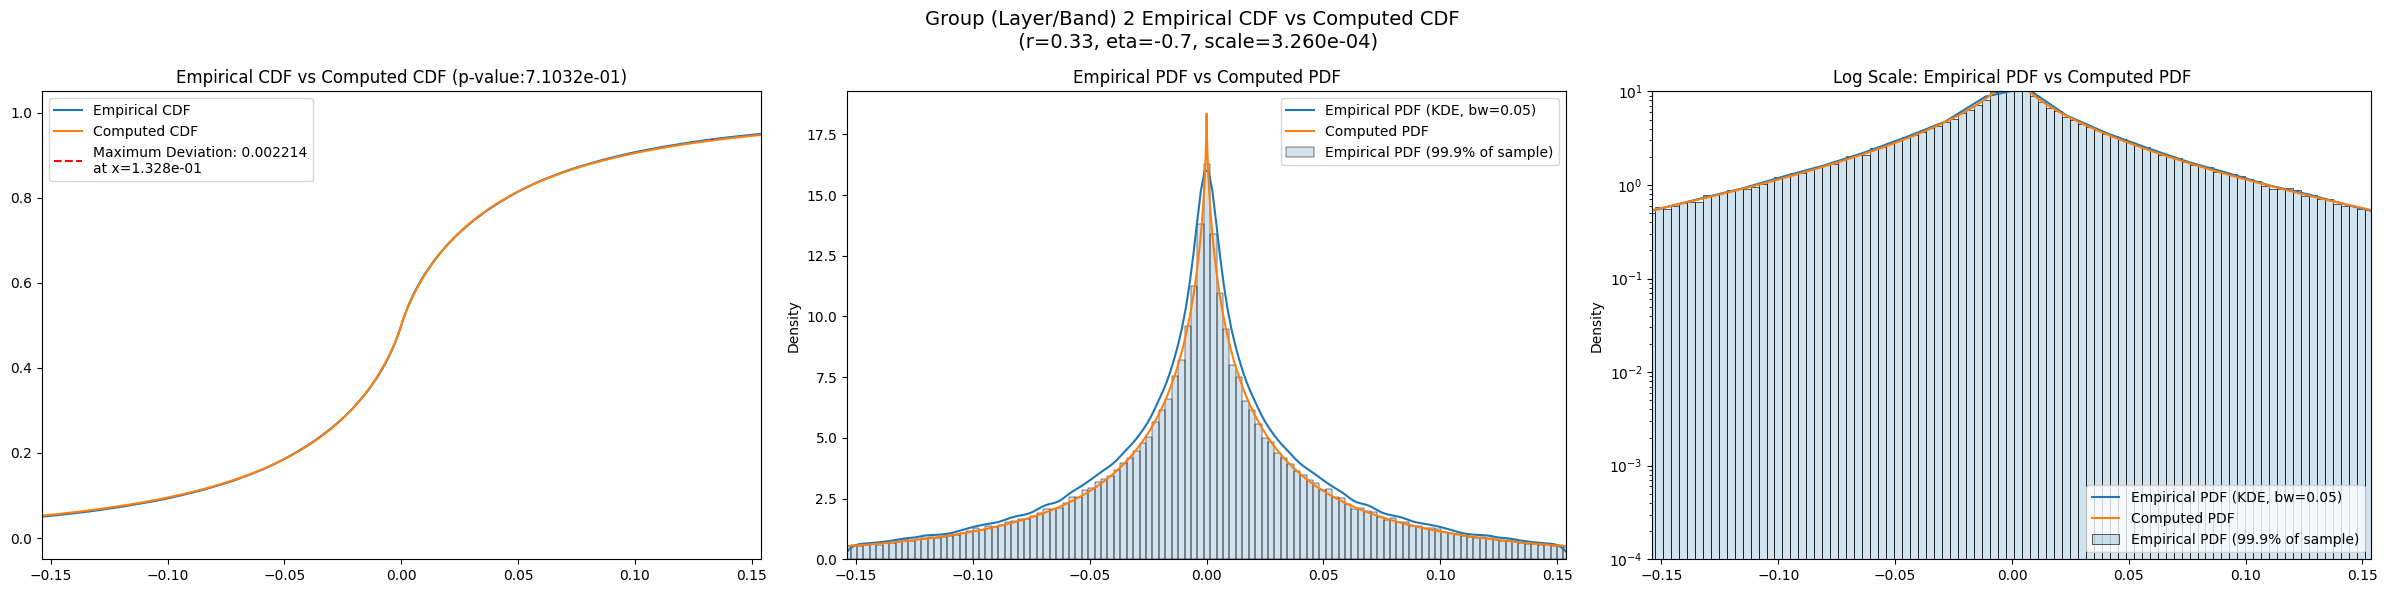

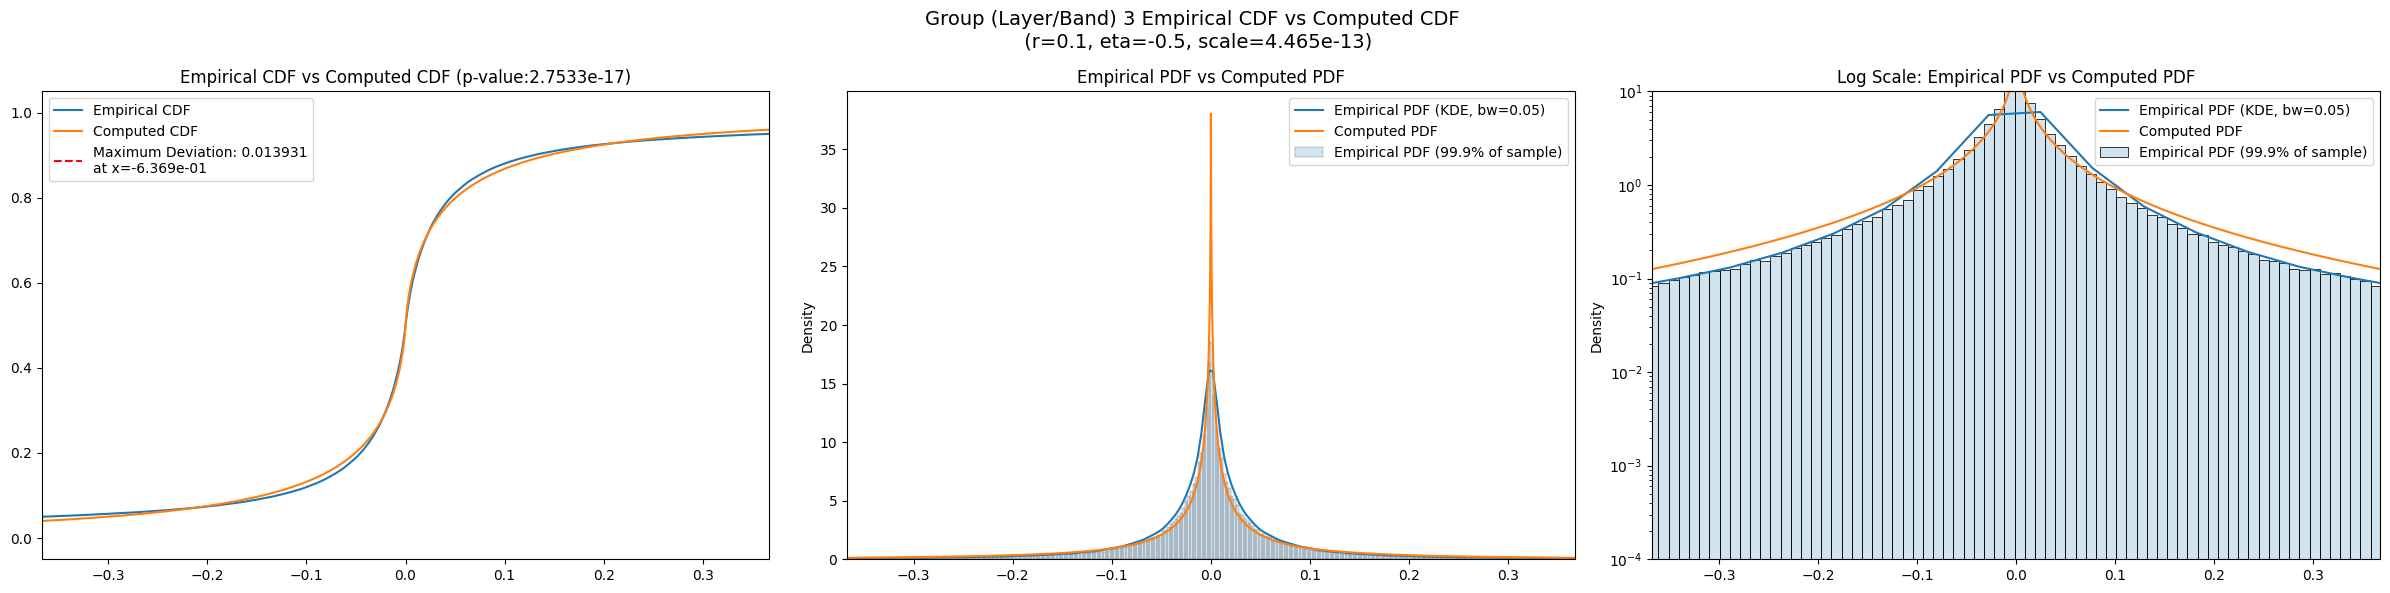

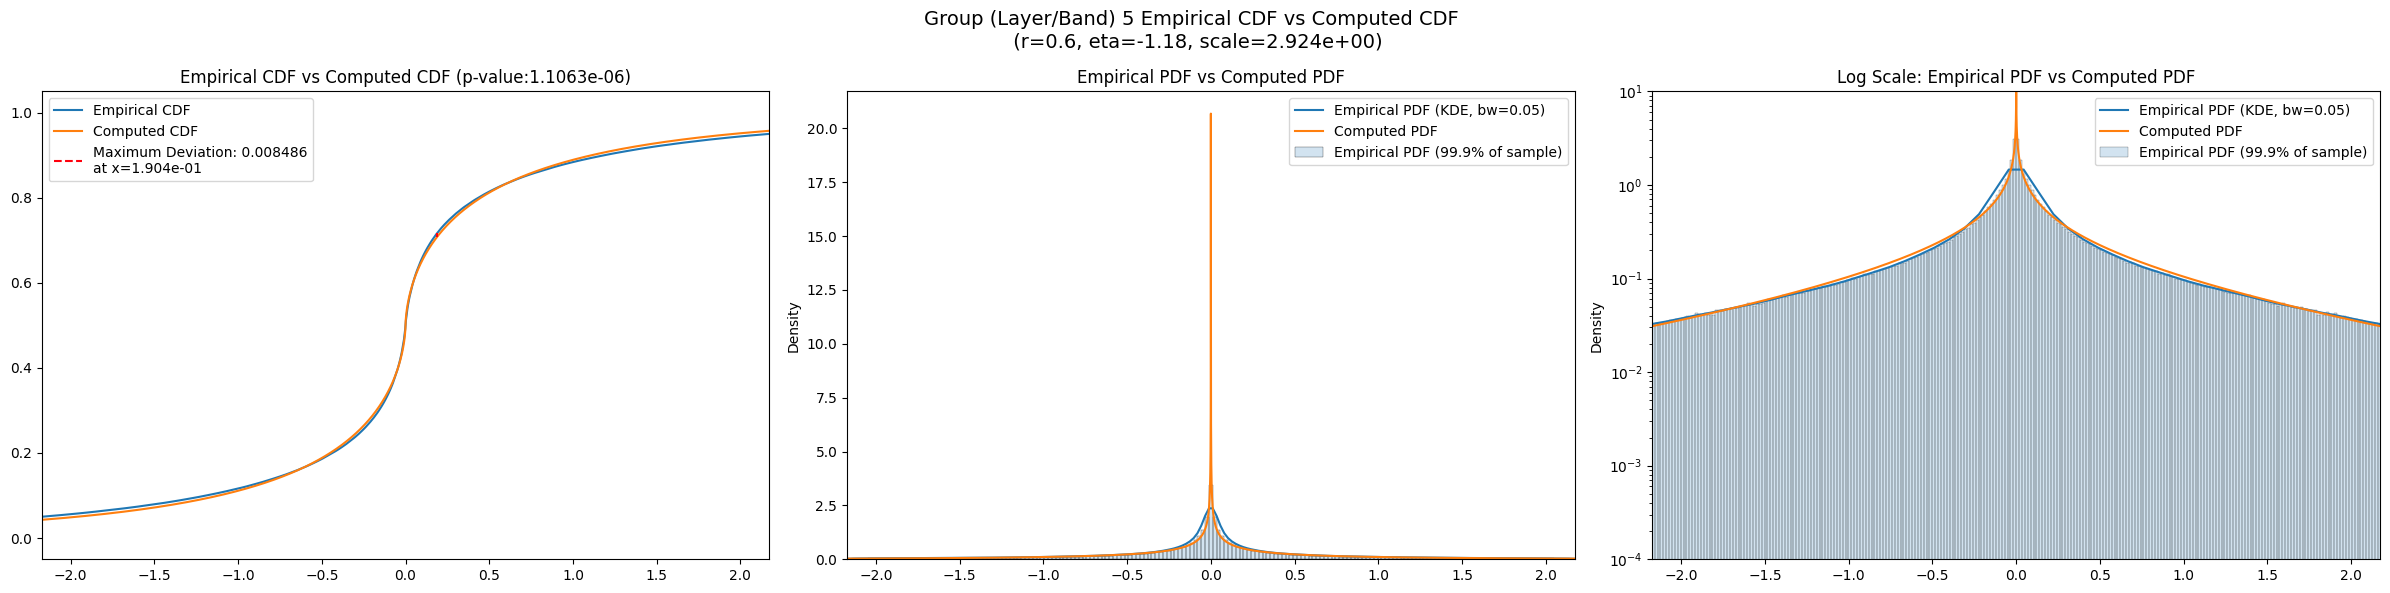

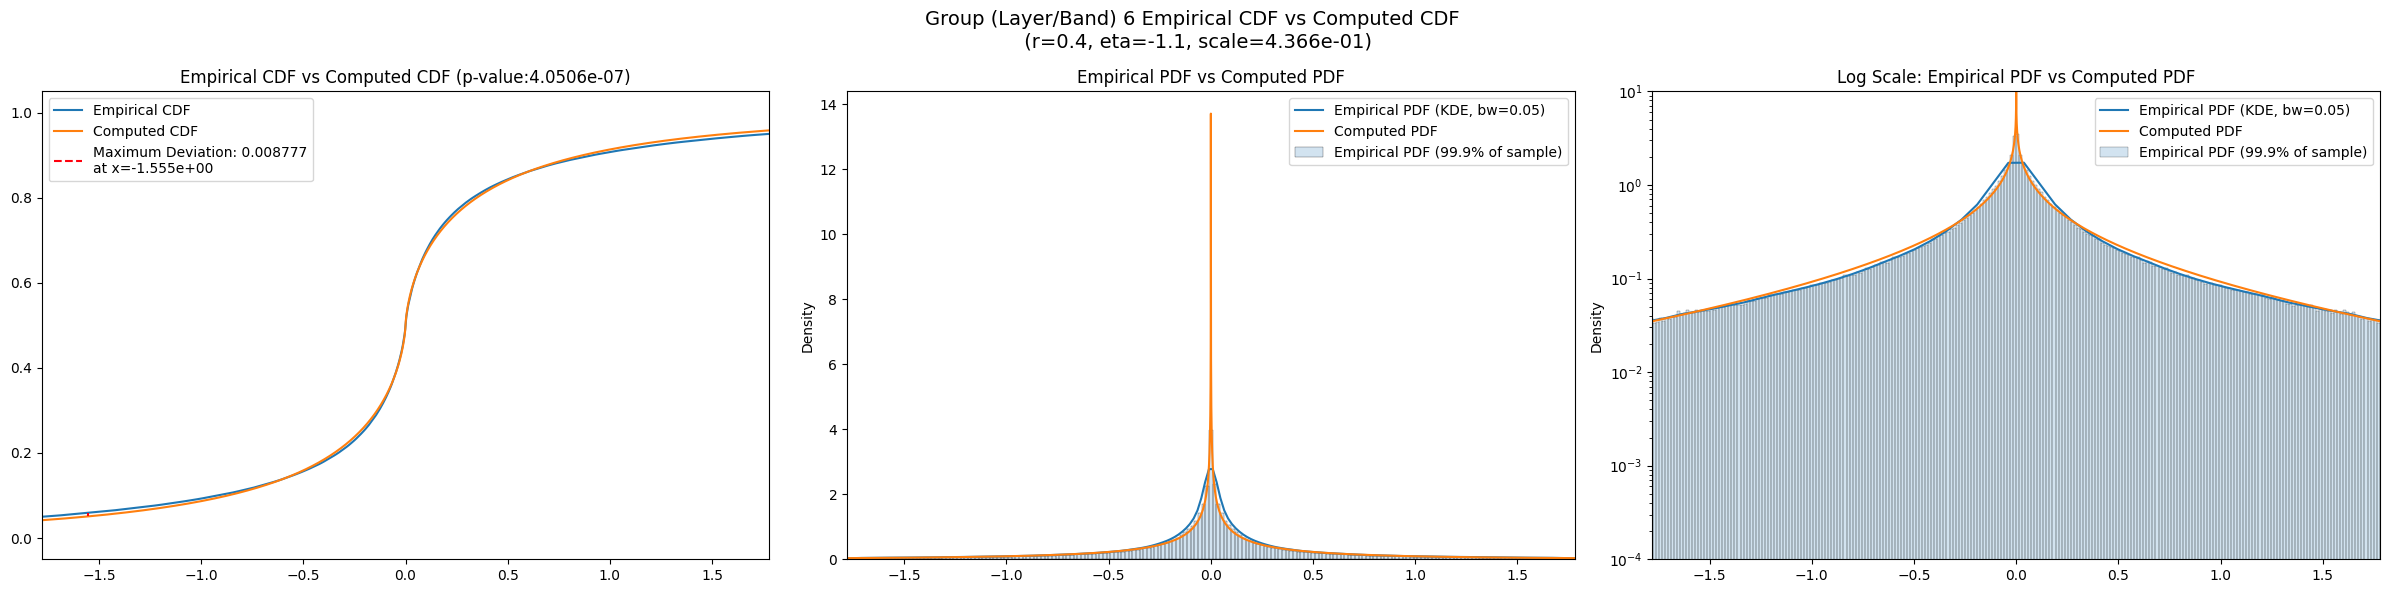

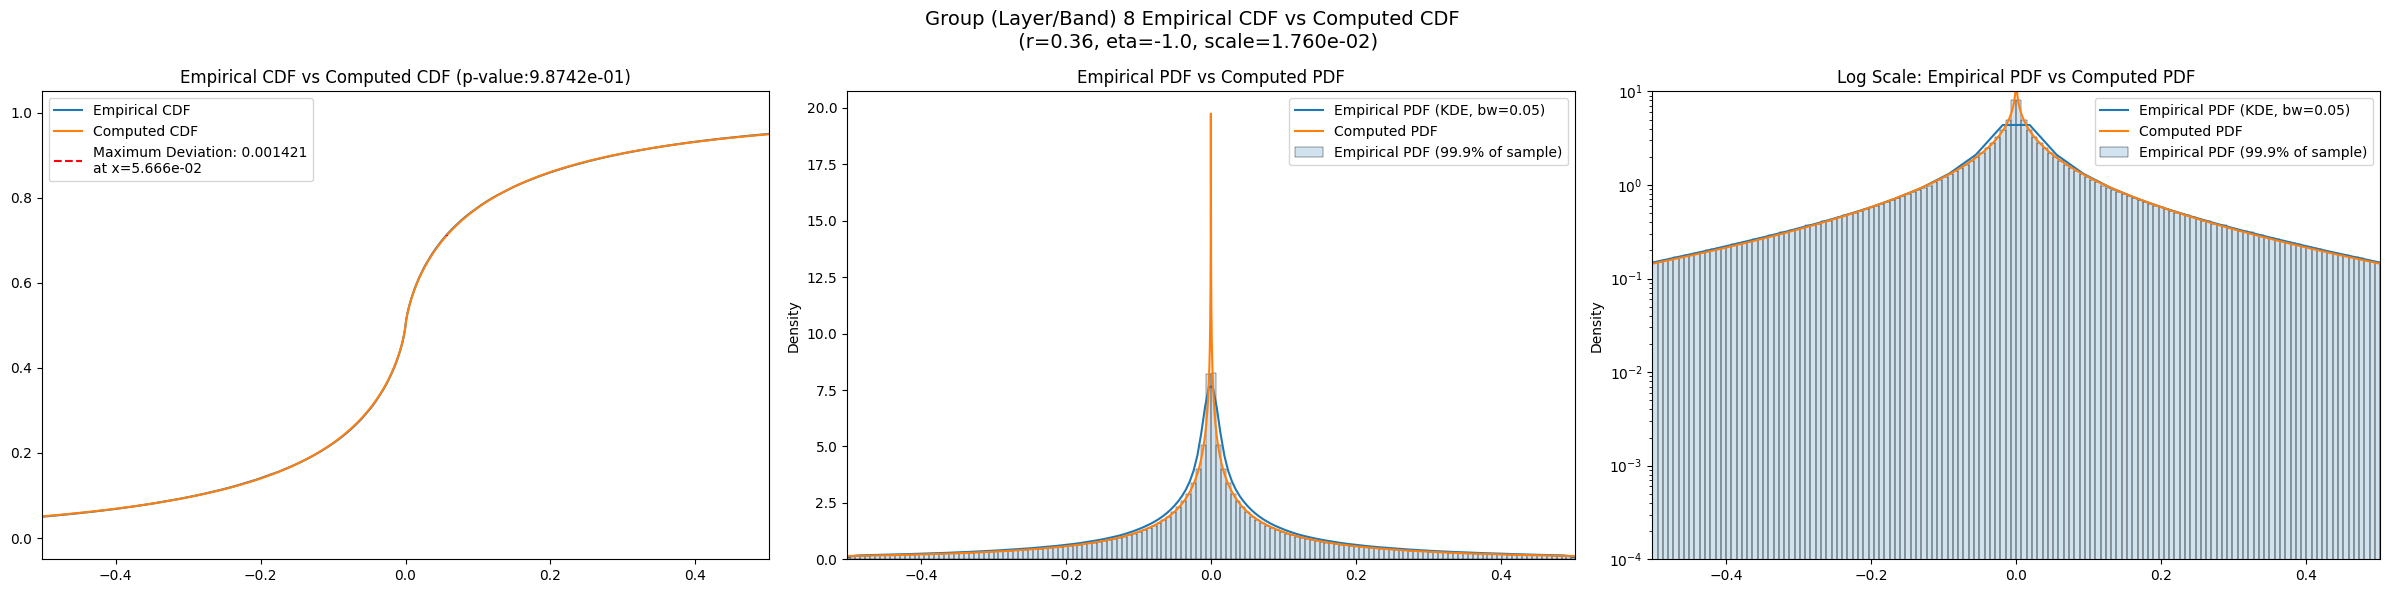

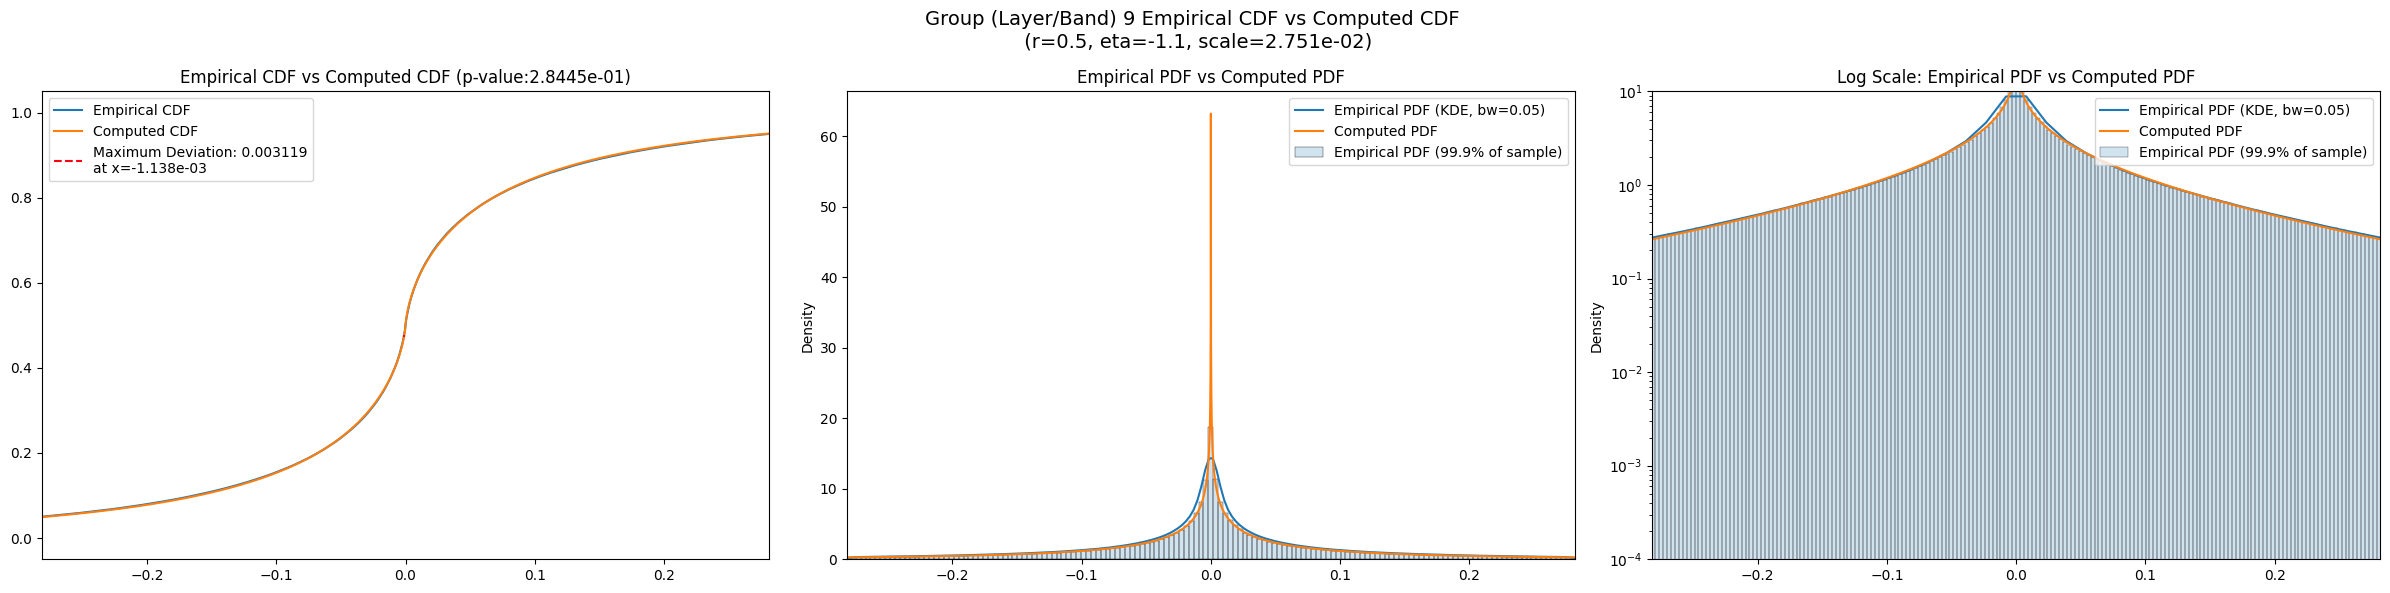

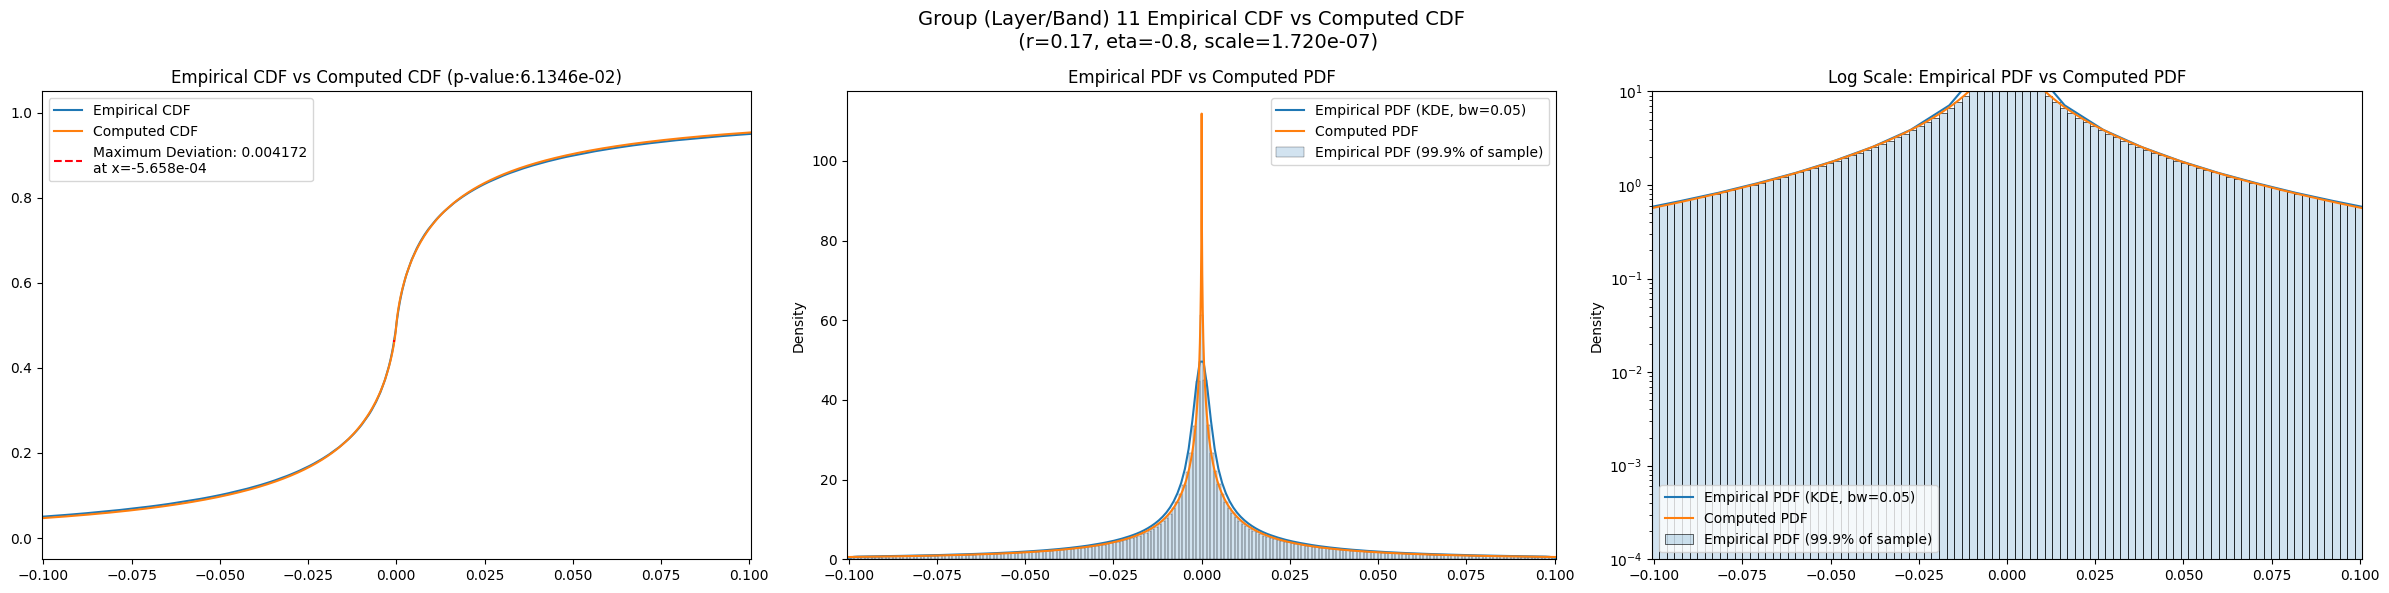

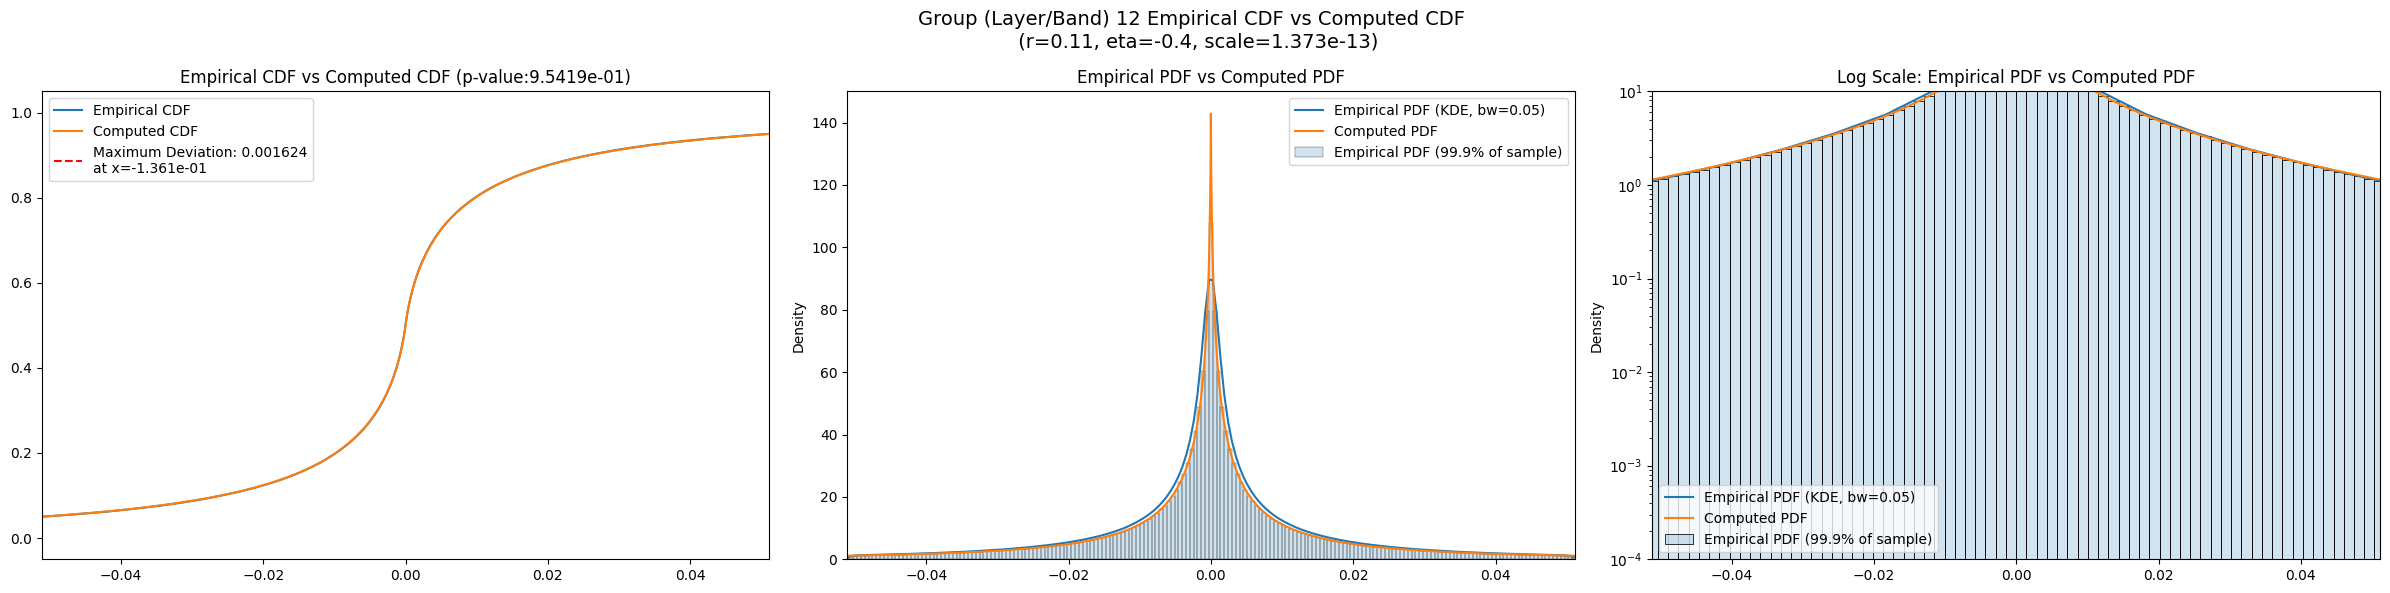

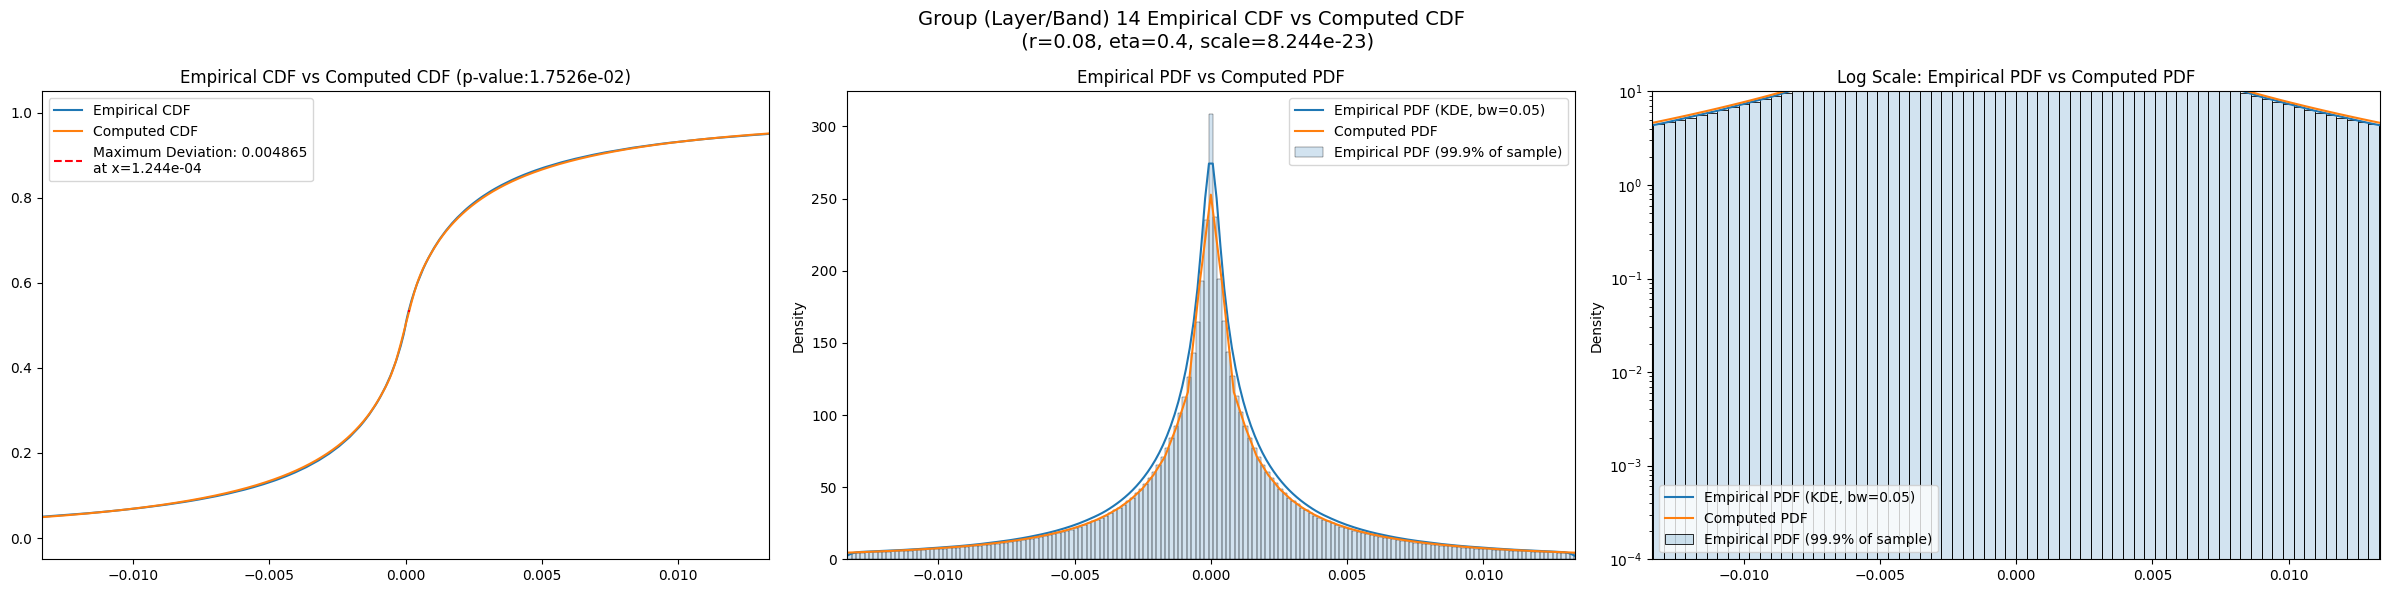

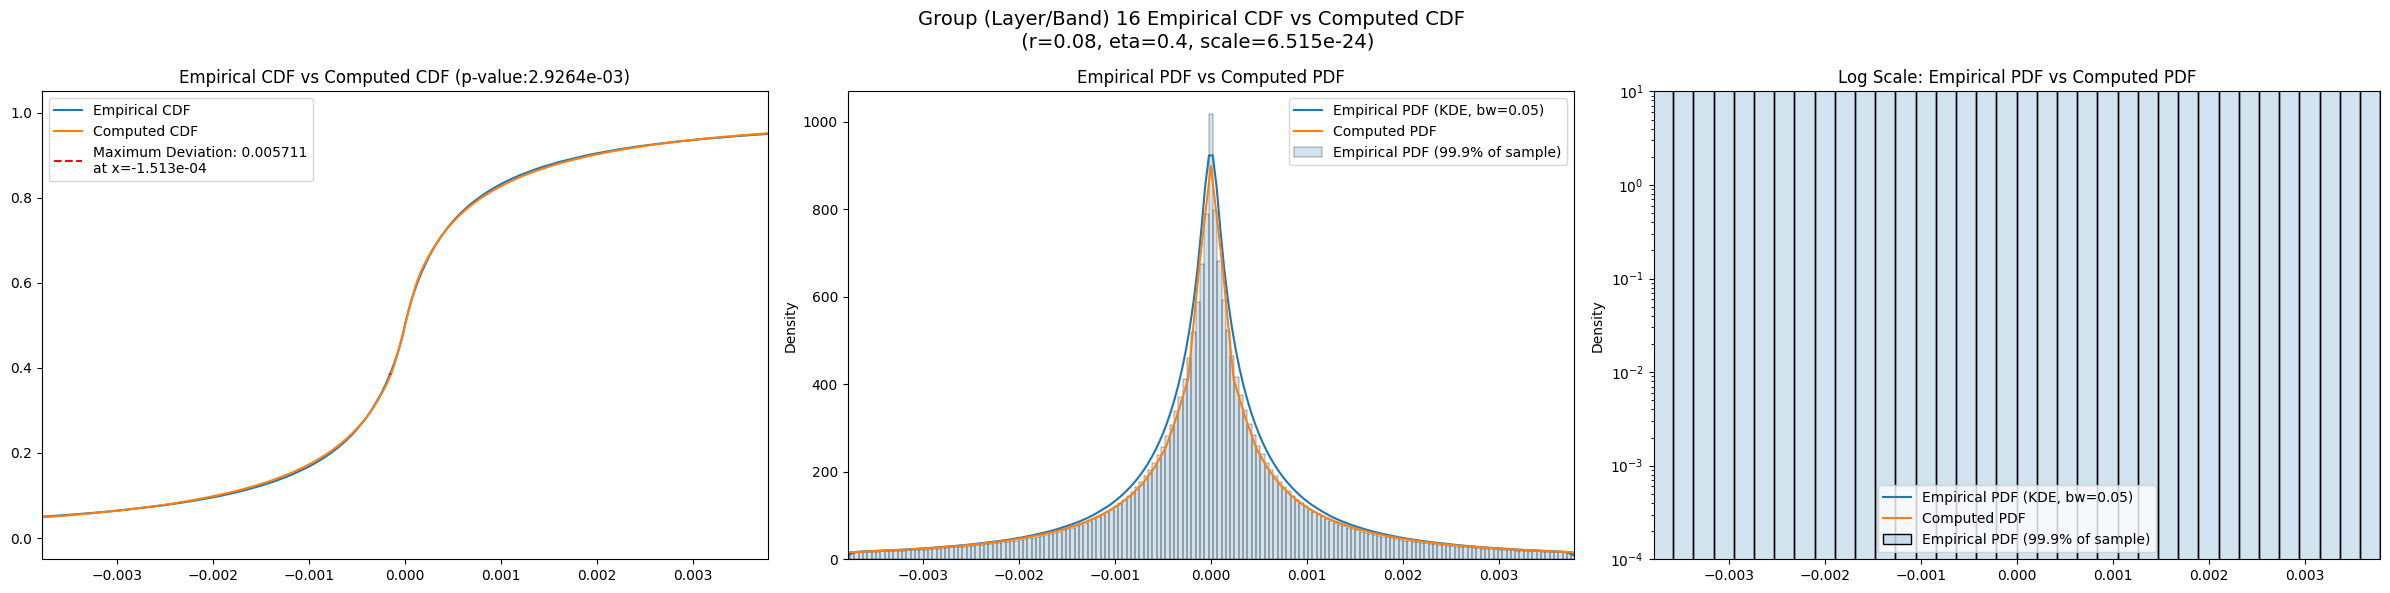

In [16]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    best_scale = group_info['best_scale']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta, best_scale), 
                    log_scale = True,
                    group = group)
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 100)

## Comparing with Gaussian and Laplace Priors

In [17]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func
    elif distro == 'prior_with_scale':
        def r_eta_scale_func(params):
            r = params[0]
            eta = params[1]
            scale = params[2]
            print(r, eta, scale)
            cdf = compute_prior_cdf(r = r, eta = eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample/ np.sqrt(scale), cdf)
        return r_eta_scale_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior','prior_with_scale', 't'")

In [18]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        if len(group_data_map[group]) == 0:
            continue
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var  var_lower  var_upper     obs_kurt  kurt_lower   kurt_upper  \
band                                                                         
2     0.020206   0.015851   0.025584    83.964375   46.909287   118.146290   
3     0.256283   0.214199   0.302689    43.138762   35.351158    51.792258   
5     2.057145   1.885970   2.233575     8.796670    7.687018    10.016815   
6     1.450882   1.325339   1.580467     9.696205    8.608607    10.835801   
8     0.160220   0.138249   0.185770    31.333083   19.939225    45.387652   
9     0.039620   0.035092   0.045332    22.360826   11.461388    58.472622   
11    0.010345   0.008290   0.013071    75.422116   36.701403   175.435022   
12    0.003920   0.002925   0.005474   150.818993   53.980298   398.559330   
14    0.000316   0.000212   0.000692   864.075969   55.677941  2196.862204   
16    0.000065   0.000035   0.000147  1081.723363  139.237130  2712.951852   

      total_samples  kstest_stat_initial  initial_r  initial_eta  ...  \
band                                                              ...   
2           99186.0             0.003078        0.5         -0.9  ...   
3          100000.0             0.014621        0.1         -0.5  ...   
5          100000.0             0.009763        0.7         -1.2  ...   
6          100000.0             0.008777        0.4         -1.1  ...   
8          100000.0             0.004114        0.5         -1.1  ...   
9          100000.0             0.003119        0.5         -1.1  ...   
11         100000.0             0.005863        0.2         -0.9  ...   
12         100000.0             0.003894        0.1         -0.3  ...   
14         100000.0             0.004759        0.1          0.0  ...   
16         100000.0             0.006320        0.1          0.1  ...   

      param_gaussian  kstest_stat_gaussian  kstest_pval_gaussian  \
band                                                               
2           0.057434              0.055649         2.038790e-267   
3           0.064887              0.080413          0.000000e+00   
5           0.541772              0.086752          0.000000e+00   
6           0.434693              0.083057          0.000000e+00   
8           0.152195              0.072313          0.000000e+00   
9           0.083969              0.074776          0.000000e+00   
11          0.023670              0.083968          0.000000e+00   
12          0.012687              0.079578          0.000000e+00   
14          0.003715              0.070798          0.000000e+00   
16          0.001053              0.069845          0.000000e+00   

      param_laplace  kstest_stat_laplace  kstest_pval_laplace   param_t  \
band                                                                      
2          0.049772             0.028980         8.452240e-73  0.039454   
3          0.059053             0.058015        5.239810e-293  0.043952   
5          0.464794             0.061887         0.000000e+00  0.358979   
6          0.378986             0.057954        2.181410e-292  0.289822   
8          0.130923             0.046736        2.988650e-190  0.102401   
9          0.071860             0.049613        2.350820e-214  0.056289   
11         0.020593             0.058995        5.529750e-303  0.015789   
12         0.011071             0.054403        1.097610e-257  0.008500   
14         0.003283             0.045422        1.012840e-179  0.002516   
16         0.000935             0.044472        2.687340e-172  0.000720   

      kstest_stat_t  kstest_pval_t  kstest_pval_gengamma  
band                                                      
2          0.031603   1.693640e-86          7.150666e-01  
3          0.052880  1.794270e-243          2.752698e-17  
5          0.062639   0.000000e+00          1.106293e-06  
6          0.057350  2.488900e-286          4.050574e-07  
8          0.048434  2.648200e-204          9.874213e-01  
9          0.051630  4.138180e-232          2.844765e-01  
11 

## Results

In [19]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [20]:
master_df.filter(regex="kstest_stat.*")

kstest_stat_initial  kstest_stat_cutoff_0.05  kstest_stat_best  \
band                                                                   
2                0.003078                 0.004311          0.002214   
3                0.014621                 0.004293          0.013931   
5                0.009763                 0.004293          0.008486   
6                0.008777                 0.004293          0.008777   
8                0.004114                 0.004293          0.001421   
9                0.003119                 0.004293          0.003119   
11               0.005863                 0.004293          0.004172   
12               0.003894                 0.004293          0.001624   
14               0.004759                 0.004293          0.003440   
16               0.006320                 0.004293          0.004817   

      kstest_stat_gaussian  kstest_stat_laplace  kstest_stat_t  
band                                                            
2                 0.055649             0.028980       0.031603  
3                 0.080413             0.058015       0.052880  
5                 0.086752             0.061887       0.062639  
6                 0.083057             0.057954       0.057350  
8                 0.072313             0.046736       0.048434  
9                 0.074776             0.049613       0.051630  
11                0.083968             0.058995       0.058486  
12                0.079578             0.054403       0.053821  
14                0.070798             0.045422       0.043757  
16                0.069845             0.044472       0.041894

In [21]:
master_df.filter(regex="best.*")

best_augmented_var  kstest_stat_best  best_r  best_eta    best_scale  \
band                                                                         
2               0.012568          0.002214    0.33     -0.70  3.260108e-04   
3               0.149679          0.013931    0.10     -0.50  4.465079e-13   
5               1.935676          0.008486    0.60     -1.18  2.924333e+00   
6               1.450882          0.008777    0.40     -1.10  4.365721e-01   
8               0.147200          0.001421    0.36     -1.00  1.760053e-02   
9               0.039620          0.003119    0.50     -1.10  2.751411e-02   
11              0.008958          0.004172    0.17     -0.80  1.720418e-07   
12              0.003158          0.001624    0.11     -0.40  1.372667e-13   
14              0.000177          0.003440    0.08      0.40  8.244393e-23   
16              0.000014          0.004817    0.08      0.40  6.514649e-24   

      best_exclude_cutoff  
band                       
2                   125.0  
3                   275.0  
5                    75.0  
6                     0.0  
8                    25.0  
9                     0.0  
11                   25.0  
12                   25.0  
14                  100.0  
16                  250.0